In [1]:
import numpy as np
import pandas as pd

In [2]:
icu_demo_ce = pd.read_csv('icu_demo_ce.csv')

In [3]:
icu_demo_ce.head()

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
0,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,47007.0,2180-07-23 22:00:00,2180-07-23 22:15:00,220045.0,94.0,94.0,bpm,0.0
1,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 19:00:00,2180-07-23 19:59:00,220045.0,97.0,97.0,bpm,0.0
2,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 20:00:00,2180-07-23 21:01:00,220045.0,100.0,100.0,bpm,0.0
3,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,66056.0,2180-07-23 21:00:00,2180-07-23 21:01:00,220045.0,94.0,94.0,bpm,0.0
4,10000032,29079034,39553978,Medical Intensive Care Unit (MICU),Medical Intensive Care Unit (MICU),2180-07-23 14:00:00,2180-07-23 23:50:47,0.410266,0 days 09:50:47,F,52,88981.0,2180-07-23 14:12:00,2180-07-23 14:17:00,220045.0,91.0,91.0,bpm,0.0


# Filter > 24hrs stay

In [4]:
# filter observations with > 24 hrs LOS
above_24_hr_filter = list(icu_demo_ce[icu_demo_ce['los'] >= 1]['hadm_id'].unique())

In [5]:
above_24_hr_filter[0:5]

[24597018, 25563031, 26184834, 23581541, 23822395]

In [6]:
pt_with_more_24hr = icu_demo_ce[icu_demo_ce['hadm_id'].isin(above_24_hr_filter)]
print(pt_with_more_24hr.shape)

(10666216, 19)


In [7]:
print(pt_with_more_24hr['subject_id'].nunique())
print(pt_with_more_24hr['hadm_id'].nunique())
pt_with_more_24hr.head()

42264
53034


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
21,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,7355.0,2157-11-21 19:00:00,2157-11-21 19:37:00,220045.0,101.0,101.0,bpm,0.0
22,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,7355.0,2157-11-21 20:00:00,2157-11-21 20:55:00,220045.0,96.0,96.0,bpm,0.0
23,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,7355.0,2157-11-21 21:00:00,2157-11-21 21:10:00,220045.0,93.0,93.0,bpm,0.0
24,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,71578.0,2157-11-21 00:00:00,2157-11-21 00:39:00,220045.0,98.0,98.0,bpm,0.0
25,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,72136.0,2157-11-21 08:00:00,2157-11-21 08:03:00,220045.0,85.0,85.0,bpm,0.0


In [8]:
pt_with_more_24hr.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'intime', 'outtime', 'los', 'duration', 'gender', 'age', 'caregiver_id',
       'charttime', 'storetime', 'itemid', 'value', 'valuenum', 'valueuom',
       'warning'],
      dtype='object')

In [9]:
pt_with_more_24hr.shape

(10666216, 19)

# Filter the first 24hrs values for each measurement

In [10]:
from datetime import datetime, timedelta

# Convert 'charttime_lab', 'intime', and 'outtime' columns to datetime
pt_with_more_24hr['charttime'] = pd.to_datetime(pt_with_more_24hr['charttime'])
pt_with_more_24hr['intime'] = pd.to_datetime(pt_with_more_24hr['intime'])
pt_with_more_24hr['outtime'] = pd.to_datetime(pt_with_more_24hr['outtime'])

/tmp/ipykernel_109/1736521363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_with_more_24hr['charttime'] = pd.to_datetime(pt_with_more_24hr['charttime'])
/tmp/ipykernel_109/1736521363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pt_with_more_24hr['intime'] = pd.to_datetime(pt_with_more_24hr['intime'])
/tmp/ipykernel_109/1736521363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [11]:
icu_24hrs_dat = pt_with_more_24hr[pt_with_more_24hr['charttime'] < pt_with_more_24hr['intime'] + timedelta(hours=24)]

In [12]:
icu_24hrs_dat.shape

(2811338, 19)

In [13]:
# Evaluate attrition from patients that have measurement within 24 hrs
print(icu_24hrs_dat['subject_id'].nunique())
print(icu_24hrs_dat['hadm_id'].nunique())
icu_24hrs_dat.head()

42212
52967


,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,age,caregiver_id,charttime,storetime,itemid,value,valuenum,valueuom,warning
21,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,7355.0,2157-11-21 19:00:00,2157-11-21 19:37:00,220045.0,101.0,101.0,bpm,0.0
24,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,71578.0,2157-11-21 00:00:00,2157-11-21 00:39:00,220045.0,98.0,98.0,bpm,0.0
25,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,72136.0,2157-11-21 08:00:00,2157-11-21 08:03:00,220045.0,85.0,85.0,bpm,0.0
26,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,72136.0,2157-11-21 09:00:00,2157-11-21 09:12:00,220045.0,85.0,85.0,bpm,0.0
27,10001217,24597018,37067082,Surgical Intensive Care Unit (SICU),Surgical Intensive Care Unit (SICU),2157-11-20 19:18:02,2157-11-21 22:08:00,1.118032,1 days 02:49:58,F,55,72136.0,2157-11-21 10:00:00,2157-11-21 10:43:00,220045.0,92.0,92.0,bpm,0.0


# Averaging the first 24 hrs values for all measurement

In [14]:
# Filtering the first two observations for each features (sorted by charttime)
# filtered_df = icu_demo_ce[icu_demo_ce.sort_values(by='charttime').groupby(['subject_id', 'hadm_id', 'stay_id','itemid'])['value'].cumcount() < 2]
# filtered_df.head()

icu_24hrs_dat_agg = icu_24hrs_dat.sort_values(by='charttime')
icu_24hrs_dat_agg = icu_24hrs_dat.groupby(['subject_id', 'hadm_id', 'stay_id','itemid'])['value'].mean().reset_index()
icu_24hrs_dat_agg.head()

,subject_id,hadm_id,stay_id,itemid,value
0,10001217,24597018,37067082,220045.0,93.200000
1,10001725,25563031,31205490,220045.0,79.480000
2,10001884,26184834,37510196,220045.0,71.392857
3,10002013,23581541,39060235,220045.0,94.636364
4,10002013,23581541,39060235,220050.0,110.619048


In [15]:
icu_24hrs_dat_agg.shape
print(icu_24hrs_dat_agg['subject_id'].nunique())
print(icu_24hrs_dat_agg['hadm_id'].nunique())

42212
52967


# Merging with ICU complete data


In [16]:
# First, create a new DataFrame with the average of the first two observations of 'value' for each group
# average_df = above_24_hr_filter.groupby(['subject_id', 'hadm_id', 'stay_id','itemid'])['value'].mean().reset_index()

# You can also include other columns if needed by merging with the original DataFrame
result_df = icu_24hrs_dat_agg.merge(icu_24hrs_dat[['subject_id', 'hadm_id', 'stay_id', 'age', 'gender', 'los','itemid','intime']],\
                                    on=['subject_id', 'hadm_id', 'stay_id','itemid'], how='left', suffixes = ['_enc','_24_hr_mean'])

# Drop any duplicate rows (if necessary)
result_df = result_df.drop_duplicates()

# Print the result
result_df.head()


,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,intime
0,10001217,24597018,37067082,220045.0,93.200000,55,F,1.118032,2157-11-20 19:18:02
25,10001725,25563031,31205490,220045.0,79.480000,46,F,1.338588,2110-04-11 15:52:22
50,10001884,26184834,37510196,220045.0,71.392857,77,F,9.171817,2131-01-11 04:20:05
78,10002013,23581541,39060235,220045.0,94.636364,57,F,1.314352,2160-05-18 10:00:53
100,10002013,23581541,39060235,220050.0,110.619048,57,F,1.314352,2160-05-18 10:00:53


In [17]:
item_id = pd.read_csv('icu/d_items.csv.gz')

In [18]:
result_df = pd.merge(result_df, item_id[["itemid","label","unitname"]], on="itemid", how="inner")

In [19]:
print(result_df['subject_id'].nunique())
print(result_df['hadm_id'].nunique())

42212
52967


In [20]:
# hr resutls
result_df[result_df['itemid']==220045].head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,intime,label,unitname
0,10001217,24597018,37067082,220045.0,93.200000,55,F,1.118032,2157-11-20 19:18:02,Heart Rate,bpm
1,10001725,25563031,31205490,220045.0,79.480000,46,F,1.338588,2110-04-11 15:52:22,Heart Rate,bpm
2,10001884,26184834,37510196,220045.0,71.392857,77,F,9.171817,2131-01-11 04:20:05,Heart Rate,bpm
3,10002013,23581541,39060235,220045.0,94.636364,57,F,1.314352,2160-05-18 10:00:53,Heart Rate,bpm
4,10002155,23822395,33685454,220045.0,73.720000,81,F,6.178912,2129-08-04 12:45:00,Heart Rate,bpm


In [21]:
# sbp results
result_df[result_df['itemid']==220050].head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,intime,label,unitname
59607,10002013,23581541,39060235,220050.0,110.619048,57,F,1.314352,2160-05-18 10:00:53,Arterial Blood Pressure systolic,mmHg
59608,10002155,23822395,33685454,220050.0,113.400000,81,F,6.178912,2129-08-04 12:45:00,Arterial Blood Pressure systolic,mmHg
59609,10002428,23473524,35479615,220050.0,110.074074,81,F,10.977222,2156-05-11 14:49:34,Arterial Blood Pressure systolic,mmHg
59610,10002428,28662225,38875437,220050.0,106.207547,81,F,7.032894,2156-04-19 18:11:19,Arterial Blood Pressure systolic,mmHg
59611,10002760,28094813,31831386,220050.0,108.434783,56,M,1.045868,2141-04-20 13:20:46,Arterial Blood Pressure systolic,mmHg


In [22]:
# dbp results
result_df[result_df['itemid']==220051].head()

,subject_id,hadm_id,stay_id,itemid,value,age,gender,los,intime,label,unitname
82521,10002013,23581541,39060235,220051.0,61.476190,57,F,1.314352,2160-05-18 10:00:53,Arterial Blood Pressure diastolic,mmHg
82522,10002155,23822395,33685454,220051.0,57.400000,81,F,6.178912,2129-08-04 12:45:00,Arterial Blood Pressure diastolic,mmHg
82523,10002428,23473524,35479615,220051.0,53.444444,81,F,10.977222,2156-05-11 14:49:34,Arterial Blood Pressure diastolic,mmHg
82524,10002428,28662225,38875437,220051.0,63.075472,81,F,7.032894,2156-04-19 18:11:19,Arterial Blood Pressure diastolic,mmHg
82525,10002760,28094813,31831386,220051.0,57.521739,56,M,1.045868,2141-04-20 13:20:46,Arterial Blood Pressure diastolic,mmHg


In [23]:
result_df['label'].unique()

array(['Heart Rate', 'Arterial Blood Pressure systolic',
       'Arterial Blood Pressure diastolic'], dtype=object)

# Pivot the lab labels as columns

In [24]:
# Pivot the the table to create hr, systolic, and diastolic column for each row
icu_demo_ce_pivoted = result_df.pivot_table(index=['subject_id', 'hadm_id','stay_id','age','gender', 'los', 'intime'], \
                            columns='label', values='value').reset_index()
icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)].head()

label,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate
0,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.200000
1,10001725,25563031,31205490,46,F,1.338588,2110-04-11 15:52:22,NaN,NaN,79.480000
2,10001884,26184834,37510196,77,F,9.171817,2131-01-11 04:20:05,NaN,NaN,71.392857
5,10002155,28994087,31090461,82,F,3.891447,2130-09-24 00:50:00,NaN,NaN,84.920000
6,10002348,22725460,32610785,77,F,9.792512,2112-11-30 23:24:00,NaN,NaN,64.880000


In [25]:
print(icu_demo_ce_pivoted['subject_id'].nunique())
print(icu_demo_ce_pivoted['hadm_id'].nunique())

42212
52967


In [26]:
print(icu_demo_ce_pivoted.shape)
print(f"number of patients with missing measurements in one encounter:{icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)]['subject_id'].nunique()}")
print(f"number of encounters with missing measurements in one encounter:{icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)]['hadm_id'].nunique()}")

(59607, 10)
number of patients with missing measurements in one encounter:26785
number of encounters with missing measurements in one encounter:33418


In [27]:
icu_demo_ce_pivoted[icu_demo_ce_pivoted.notnull().any(axis=1)].head()

label,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate
0,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.200000
1,10001725,25563031,31205490,46,F,1.338588,2110-04-11 15:52:22,NaN,NaN,79.480000
2,10001884,26184834,37510196,77,F,9.171817,2131-01-11 04:20:05,NaN,NaN,71.392857
3,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364
4,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.40000,113.400000,73.720000


In [28]:
print(f"number of observations with complete measurement (HR, SBP, DBP) within the same encounter: {icu_demo_ce_pivoted[~icu_demo_ce_pivoted.isna().any(axis=1)].shape}")
complete_obs_ce = icu_demo_ce_pivoted[~icu_demo_ce_pivoted.isna().any(axis=1)]
complete_obs_ce.head()

number of observations with complete measurement (HR, SBP, DBP) within the same encounter: (22914, 10)


label,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate
3,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.476190,110.619048,94.636364
4,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.400000,113.400000,73.720000
8,10002428,23473524,35479615,81,F,10.977222,2156-05-11 14:49:34,53.444444,110.074074,89.259259
10,10002428,28662225,38875437,81,F,7.032894,2156-04-19 18:11:19,63.075472,106.207547,105.207317
14,10002760,28094813,31831386,56,M,1.045868,2141-04-20 13:20:46,57.521739,108.434783,72.560000


In [29]:
print(f"number of patients with complete measurements in one encounter:{complete_obs_ce['subject_id'].nunique()}")
print(f"number of encounters with complete measurements in one encounter:{complete_obs_ce['hadm_id'].nunique()}")

number of patients with complete measurements in one encounter:20361
number of encounters with complete measurements in one encounter:21902


In [30]:
# Create a boolean mask
mask = ~icu_demo_ce_pivoted.set_index(['subject_id', 'hadm_id']).index.isin(complete_obs_ce.set_index(['subject_id', 'hadm_id']).index)

# Apply the mask
non_complete_ce = icu_demo_ce_pivoted[mask]

In [31]:
print(f"number of patients with incomplete measurements in one encounter:{non_complete_ce['subject_id'].nunique()}")
print(f"number of encounters with incomplete measurements in one encounter:{non_complete_ce['hadm_id'].nunique()}")

number of patients with incomplete measurements in one encounter:25087
number of encounters with incomplete measurements in one encounter:31065


# Looking at overlapping subject id and hadm id with and without missing values

In [32]:
total_unique_subjects = icu_demo_ce_pivoted['subject_id'].nunique()
total_unique_hadm = icu_demo_ce_pivoted['hadm_id'].nunique()

missing_value_subjects = icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)]['subject_id'].nunique()
missing_value_hadm = icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)]['hadm_id'].nunique()

complete_value_subjects = complete_obs_ce['subject_id'].nunique()
complete_value_hadm = complete_obs_ce['hadm_id'].nunique()

print(f"Total unique subjects: {total_unique_subjects}")
print(f"Total unique HADM: {total_unique_hadm}")
print(f"Sum of unique IDs from both subsets: {missing_value_subjects + complete_value_subjects}, {missing_value_hadm + complete_value_hadm}")


Total unique subjects: 42212
Total unique HADM: 52967
Sum of unique IDs from both subsets: 47146, 55320


In [33]:
# Get the sets of unique subject and hadm IDs for each subset
missing_value_subject_ids = set(icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)]['subject_id'].unique())
complete_value_subject_ids = set(complete_obs_ce['subject_id'].unique())

missing_value_hadm_ids = set(icu_demo_ce_pivoted[icu_demo_ce_pivoted.isna().any(axis=1)]['hadm_id'].unique())
complete_value_hadm_ids = set(complete_obs_ce['hadm_id'].unique())

# Find the intersection of the sets to identify overlapping IDs
overlapping_subject_ids = missing_value_subject_ids.intersection(complete_value_subject_ids)
overlapping_hadm_ids = missing_value_hadm_ids.intersection(complete_value_hadm_ids)

print(f"Number of overlapping subject IDs: {len(overlapping_subject_ids)}")
print(f"Number of overlapping HADM IDs: {len(overlapping_hadm_ids)}")


Number of overlapping subject IDs: 4934
Number of overlapping HADM IDs: 2353


In [34]:
icu_demo_ce_pivoted[icu_demo_ce_pivoted['subject_id'].isin(overlapping_subject_ids)]

label,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate
4,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.400000,113.400000,73.720000
5,10002155,28994087,31090461,82,F,3.891447,2130-09-24 00:50:00,NaN,NaN,84.920000
7,10002428,20321825,34807493,81,F,2.023843,2156-04-30 21:53:00,NaN,NaN,93.640000
8,10002428,23473524,35479615,81,F,10.977222,2156-05-11 14:49:34,53.444444,110.074074,89.259259
9,10002428,28662225,33987268,81,F,4.981134,2156-04-12 16:24:18,NaN,NaN,110.387755
...,...,...,...,...,...,...,...,...,...,...
59579,19997293,20208898,38350444,76,M,10.561991,2123-10-20 02:05:01,55.190476,108.476190,75.240000
59580,19997293,26366652,36403582,76,M,2.473252,2123-11-17 05:47:01,NaN,NaN,42.217391
59581,19997293,28847872,31877557,76,M,5.894792,2123-12-29 01:48:04,58.478261,110.260870,71.423077
59582,19997367,20617667,35616526,63,F,25.337569,2126-04-21 10:09:25,66.675676,104.567568,86.842105


# Getting values with interval of < 30 days from admission time

In [ ]:
# Loading and displaying item id within lab table
lab_id = pd.read_csv('hosp/d_labitems.csv.gz')
# Loading lab table
lab_df = pd.read_csv("hosp/labevents.csv.gz")

In [38]:
lab_id[lab_id['itemid']==50963].head()

,itemid,label,fluid,category
160,50963,NTproBNP,Blood,Chemistry


In [39]:
# HDL: 50904, total cholesterol : 50907, glucose : 51478, bnp =50963
bnp_hdl_chol_glu_lab = lab_df[lab_df["itemid"].isin([50904,50907,50931, 50963])]
bnp_hdl_chol_glu_lab.head()

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
15,16,10000032,NaN,52958335,50904,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,52,52.0,mg/dL,NaN,NaN,NaN,ROUTINE,NaN
17,18,10000032,NaN,52958335,50907,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,202,202.0,mg/dL,0.0,199.0,abnormal,ROUTINE,NaN
59,60,10000032,NaN,73913913,50931,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:56:00,___,95.0,mg/dL,70.0,100.0,NaN,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."
103,104,10000032,NaN,43430170,50931,NaN,2180-05-06 22:25:00,2180-05-06 23:16:00,___,109.0,mg/dL,70.0,100.0,abnormal,STAT,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."
150,151,10000032,22595853.0,93044861,50931,NaN,2180-05-07 05:05:00,2180-05-07 07:03:00,___,99.0,mg/dL,70.0,100.0,NaN,ROUTINE,"IF FASTING, 70-100 NORMAL, >125 PROVISIONAL DI..."


In [ ]:
bnp_hdl_chol_glu_lab.to_csv('bnp_hdl_chol_glu.csv', index=False)

In [40]:
bnp_hdl_chol_glu_lab['valueuom'].unique()

array(['mg/dL', 'pg/mL'], dtype=object)

In [41]:
bnp_hdl_chol_glu_lab.shape

(3311010, 16)

In [42]:
sum(bnp_hdl_chol_glu_lab['hadm_id'].isna())

1409165

In [43]:
lab_ce_icu_stay = pd.merge(icu_24hrs_dat, bnp_hdl_chol_glu_lab[["subject_id","hadm_id","valuenum","itemid", "charttime"]], on=["subject_id", "hadm_id"], how='inner', suffixes=("_ce", "_lab"))

In [44]:
lab_ce_icu_stay.tail(20)

,subject_id,hadm_id,stay_id,first_careunit,last_careunit,intime,outtime,los,duration,gender,...,charttime_ce,storetime,itemid_ce,value,valuenum_ce,valueuom,warning,valuenum_lab,itemid_lab,charttime_lab
47288617,19999987,23865745,36195440,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,1 days 22:30:30,F,...,2145-11-03 05:00:00,2145-11-03 05:05:00,220045.0,93.0,93.0,bpm,0.0,90.0,50931,2145-11-05 06:10:00
47288618,19999987,23865745,36195440,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,1 days 22:30:30,F,...,2145-11-03 05:00:00,2145-11-03 05:05:00,220045.0,93.0,93.0,bpm,0.0,124.0,50931,2145-11-06 10:07:00
47288619,19999987,23865745,36195440,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,1 days 22:30:30,F,...,2145-11-03 05:00:00,2145-11-03 05:05:00,220045.0,93.0,93.0,bpm,0.0,94.0,50931,2145-11-07 06:00:00
47288620,19999987,23865745,36195440,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,1 days 22:30:30,F,...,2145-11-03 05:00:00,2145-11-03 05:05:00,220045.0,93.0,93.0,bpm,0.0,99.0,50931,2145-11-09 05:30:00
47288621,19999987,23865745,36195440,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,1 days 22:30:30,F,...,2145-11-03 06:00:00,2145-11-03 06:05:00,220045.0,90.0,90.0,bpm,0.0,48.0,50904,2145-11-03 01:35:00
47288622,19999987,23865745,36195440,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,1 days 22:30:30,F,...,2145-11-03 06:00:00,2145-11-03 06:05:00,220045.0,90.0,90.0,bpm,0.0,166.0,50907,2145-11-03 01:35:00
47288623,19999987,23865745,36195440,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,1 days 22:30:30,F,...,2145-11-03 06:00:00,2145-11-03 06:05:00,220045.0,90.0,90.0,bpm,0.0,113.0,50931,2145-11-03 01:35:00
47288624,19999987,23865745,36195440,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,1 days 22:30:30,F,...,2145-11-03 06:00:00,2145-11-03 06:05:00,220045.0,90.0,90.0,bpm,0.0,100.0,50931,2145-11-04 05:01:00
47288625,19999987,23865745,36195440,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,1 days 22:30:30,F,...,2145-11-03 06:00:00,2145-11-03 06:05:00,220045.0,90.0,90.0,bpm,0.0,90.0,50931,2145-11-05 06:10:00
47288626,19999987,23865745,36195440,Trauma SICU (TSICU),Trauma SICU (TSICU),2145-11-02 22:59:00,2145-11-04 21:29:30,1.937847,1 days 22:30:30,F,...,2145-11-03 06:00:00,2145-11-03 06:05:00,220045.0,90.0,90.0,bpm,0.0,124.0,50931,2145-11-06 10:07:00


In [45]:
lab_ce_icu_stay.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'first_careunit', 'last_careunit',
       'intime', 'outtime', 'los', 'duration', 'gender', 'age', 'caregiver_id',
       'charttime_ce', 'storetime', 'itemid_ce', 'value', 'valuenum_ce',
       'valueuom', 'warning', 'valuenum_lab', 'itemid_lab', 'charttime_lab'],
      dtype='object')

In [46]:
from datetime import datetime, timedelta

lab_ce_icu_stay['charttime_lab'] = pd.to_datetime(lab_ce_icu_stay['charttime_lab'])
lab_ce_icu_stay['intime'] = pd.to_datetime(lab_ce_icu_stay['intime'])
lab_ce_icu_stay['outtime'] = pd.to_datetime(lab_ce_icu_stay['outtime'])
lab_ce_icu_stay = lab_ce_icu_stay[lab_ce_icu_stay['charttime_lab'] >= lab_ce_icu_stay['intime'] - timedelta(days=30)]
lab_ce_icu_stay = lab_ce_icu_stay[lab_ce_icu_stay['charttime_lab'] <= lab_ce_icu_stay['outtime']]

In [47]:
lab_ce_icu_stay.shape

(29874759, 22)

In [48]:
lab_ce_icu_stay[['subject_id','hadm_id',"itemid_lab","charttime_lab","intime","valuenum_lab"]].head()

,subject_id,hadm_id,itemid_lab,charttime_lab,intime,valuenum_lab
0,10001217,24597018,50931,2157-11-20 13:30:00,2157-11-20 19:18:02,112.0
1,10001217,24597018,50931,2157-11-21 03:16:00,2157-11-20 19:18:02,113.0
5,10001217,24597018,50931,2157-11-20 13:30:00,2157-11-20 19:18:02,112.0
6,10001217,24597018,50931,2157-11-21 03:16:00,2157-11-20 19:18:02,113.0
10,10001217,24597018,50931,2157-11-20 13:30:00,2157-11-20 19:18:02,112.0


In [49]:
lab_ce_icu_30days_id = set(lab_ce_icu_stay["hadm_id"])

In [50]:
len(lab_ce_icu_30days_id)

52690

In [51]:
lab_ce_icu_30days_id = list(lab_ce_icu_30days_id)

In [52]:
lab_ce_icu_30days_id[0:5]

[24903681, 24510466, 27262979, 25034757, 29622279]

In [53]:
icu_demo_ce_with_lab30 = icu_demo_ce_pivoted[icu_demo_ce_pivoted["hadm_id"].isin(lab_ce_icu_30days_id)]

In [54]:
print(icu_demo_ce_with_lab30.shape)
print(icu_demo_ce_with_lab30['subject_id'].nunique())
print(icu_demo_ce_with_lab30['hadm_id'].nunique())

(59315, 10)
42001
52690


# Filter patients with ECG

In [55]:
# ECG IDs
ecg_ids = pd.read_csv('patient_ids.csv')

In [56]:
ecg_ids

,subject_id
0,19414987
1,19416768
2,19418102
3,19415714
4,19413563
...,...
160715,10656758
160716,10652480
160717,10655416
160718,10657243


In [57]:
icu_demo_ce_with_lab30_ecg = icu_demo_ce_with_lab30[icu_demo_ce_with_lab30['subject_id'].isin(ecg_ids['subject_id'])]

In [58]:
print('Total ICU with lab + ecg')
print(icu_demo_ce_with_lab30[icu_demo_ce_with_lab30['subject_id'].isin(ecg_ids['subject_id'])]['subject_id'].nunique())
print(icu_demo_ce_with_lab30[icu_demo_ce_with_lab30['subject_id'].isin(ecg_ids['subject_id'])]['hadm_id'].nunique())
icu_demo_ce_with_lab30_ecg.head()

Total ICU with lab + ecg
37047
47472


label,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate
0,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.200000
1,10001725,25563031,31205490,46,F,1.338588,2110-04-11 15:52:22,NaN,NaN,79.480000
2,10001884,26184834,37510196,77,F,9.171817,2131-01-11 04:20:05,NaN,NaN,71.392857
3,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364
4,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.40000,113.400000,73.720000


# Preparation to merge the chart events with dx code

In [59]:
# Loading dx table
dx_df = pd.read_csv('hosp/diagnoses_icd.csv.gz')
dx_df.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


In [60]:
icu_demo_ce_with_lab30_ecg_with_dx = pd.merge(icu_demo_ce_with_lab30_ecg, dx_df, how='left',on=['subject_id', 'hadm_id'])

In [61]:
# Missing ICD codes
icu_demo_ce_with_lab30_ecg_with_dx[icu_demo_ce_with_lab30_ecg_with_dx['icd_code'].isnull()]

,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version
166405,11648537,23810242,31482469,83,F,6.642627,2156-05-07 00:37:00,50.142857,99.785714,86.520000,NaN,NaN,NaN
269117,12656796,25392033,32063503,70,M,6.435613,2150-08-06 07:24:00,NaN,NaN,116.764706,NaN,NaN,NaN
297754,12953330,26387132,39412320,57,M,1.689826,2158-01-16 04:59:42,NaN,NaN,91.320000,NaN,NaN,NaN
344149,13404558,28373841,38563486,40,F,3.080312,2167-10-31 17:20:00,NaN,NaN,68.130435,NaN,NaN,NaN
359002,13544691,22569393,35906433,54,M,21.780370,2140-11-17 02:14:00,77.272727,134.272727,95.760000,NaN,NaN,NaN
441059,14349469,29566607,30826704,34,F,2.478333,2138-04-02 08:57:00,56.823529,92.352941,87.583333,NaN,NaN,NaN
573966,15662315,23217565,36322244,53,M,2.058438,2174-07-31 19:20:00,53.043478,96.347826,71.307692,NaN,NaN,NaN
689236,16820602,29997616,37117311,48,M,1.425486,2147-10-24 09:41:00,NaN,NaN,85.375000,NaN,NaN,NaN
727183,17225329,25161730,31267603,57,F,3.953681,2199-04-15 00:04:14,74.000000,121.400000,83.233333,NaN,NaN,NaN
748988,17440648,23556381,34982213,89,F,2.000775,2185-11-29 16:43:25,NaN,NaN,61.384615,NaN,NaN,NaN


In [62]:
icu_demo_ce_with_lab30_ecg_with_dx = icu_demo_ce_with_lab30_ecg_with_dx[icu_demo_ce_with_lab30_ecg_with_dx['icd_code'].notnull()]

In [63]:
# Total patients that have dx 
print(icu_demo_ce_with_lab30_ecg_with_dx['subject_id'].nunique())
print(icu_demo_ce_with_lab30_ecg_with_dx['hadm_id'].nunique())

37037
47457


In [64]:
# Filter hfpef and hfref
# List of starting strings
hfref_code = ['4282', 'I502']
hfpef_code = ['4283', 'I503']
hf_code = ['4282', 'I502', '4283', 'I503']

# Filter the DataFrame
# observations with hfpef icd code
hfpef_dx = dx_df[dx_df["icd_code"].apply(lambda x: any(str(x).startswith(code) for code in hfpef_code))] 

# observations with hfref icd code
hfref_dx = dx_df[dx_df["icd_code"].apply(lambda x: any(str(x).startswith(code) for code in hfref_code))]


In [65]:
# checking the validity of the observations (only have icd codes for hf)
print(hfpef_dx['icd_code'].unique())
print(hfref_dx['icd_code'].unique())

['I5033' '42832' '42833' 'I5030' 'I5031' 'I5032' '42830' '42831']
['42823' 'I5023' '42821' '42822' 'I5022' '42820' 'I5020' 'I5021']


In [66]:
# checking the number of the observations (only have icd codes for hf)
print(hfpef_dx['icd_code'].shape)
print(hfref_dx['icd_code'].shape)

(27938,)
(21787,)


In [67]:
# creating mask to get obs with non-hf icd code
hfpef_hfref_dx = dx_df[dx_df["icd_code"].apply(lambda x: any(str(x).startswith(code) for code in hf_code))]

In [68]:
hfpef_hfref_dx.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
232,10000980,20897796,2,I5033,10
252,10000980,24947999,1,42823,9
279,10000980,25242409,7,42832,9
308,10000980,25911675,2,I5023,10
330,10000980,26913865,2,42823,9


In [69]:
print(hfpef_hfref_dx['icd_code'].unique())
print(hfpef_hfref_dx['icd_code'].shape)
print(hfpef_hfref_dx['icd_code'].shape)

['I5033' '42823' '42832' 'I5023' '42833' 'I5030' 'I5031' 'I5032' '42830'
 '42821' '42822' 'I5022' '42820' '42831' 'I5020' 'I5021']
(49725,)
(49725,)


In [70]:
# Assuming hfpef_hfref_dx contains 'subject_id' and 'hadm_id' columns
non_hf_dx = dx_df[~dx_df["icd_code"].apply(lambda x: any(str(x).startswith(code) for code in hf_code))]
non_hf_dx.head()


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


In [71]:
# merge obs with > 24 hrs vital signs data with the hf dx
hf_above_24_hr_ce_dx = pd.merge(icu_demo_ce_with_lab30_ecg, hfpef_hfref_dx, on=["subject_id", "hadm_id"], how='inner')
hf_above_24_hr_ce_dx.head()

,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version
0,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9
1,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.40000,113.400000,73.720000,3,42821,9
2,10002155,28994087,31090461,82,F,3.891447,2130-09-24 00:50:00,NaN,NaN,84.920000,4,42822,9
3,10002430,26295318,38392119,90,M,2.922593,2129-06-13 00:43:08,NaN,NaN,84.296296,1,I5023,10
4,10003400,23559586,34577403,75,F,2.916701,2137-08-10 19:54:51,NaN,NaN,97.076923,20,I5032,10


In [72]:
print("hf_total")
print(hf_above_24_hr_ce_dx.shape)
print(f"num of pt: {hf_above_24_hr_ce_dx['subject_id'].nunique()}")
print(f"num of enc: {hf_above_24_hr_ce_dx['hadm_id'].nunique()}")

hf_total
(13286, 13)
num of pt: 8598
num of enc: 11305


In [73]:
# merge obs > 24 hrs vital signs with the non-hf dx
non_hf_above_24_hr_ce_dx = pd.merge(icu_demo_ce_with_lab30_ecg, non_hf_dx, on=["subject_id", "hadm_id"], how='inner')
non_hf_above_24_hr_ce_dx.head()

,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version
0,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.2,1,3240,9
1,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.2,2,3484,9
2,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.2,3,3485,9
3,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.2,4,5180,9
4,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.2,5,340,9


In [74]:
print(non_hf_above_24_hr_ce_dx.shape)

(994913, 13)


In [75]:
# Drop duplicates
non_hf_above_24_hr_ce_dx.drop_duplicates(subset=['subject_id', 'hadm_id', 'stay_id'], keep='first', inplace=True)
non_hf_above_24_hr_ce_dx.head()

,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version
0,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.200000,1,3240,9
10,10001725,25563031,31205490,46,F,1.338588,2110-04-11 15:52:22,NaN,NaN,79.480000,1,78829,9
28,10001884,26184834,37510196,77,F,9.171817,2131-01-11 04:20:05,NaN,NaN,71.392857,1,J441,10
64,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,1,41401,9
85,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.40000,113.400000,73.720000,1,41011,9


In [76]:
print("non_hf_total")
print(non_hf_above_24_hr_ce_dx.shape)
print(f"num of pt: {non_hf_above_24_hr_ce_dx['subject_id'].nunique()}")
print(f"num of enc: {non_hf_above_24_hr_ce_dx['hadm_id'].nunique()}")

non_hf_total
(53557, 13)
num of pt: 37037
num of enc: 47457


In [77]:
# Checking overlapping patient within the hf and non-hf
non_hf_above_24_hr_ce_dx[non_hf_above_24_hr_ce_dx['subject_id'].isin(hf_above_24_hr_ce_dx['subject_id'])].head()

,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version
64,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.476190,110.619048,94.636364,1,41401,9
85,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.400000,113.400000,73.720000,1,41011,9
104,10002155,28994087,31090461,82,F,3.891447,2130-09-24 00:50:00,NaN,NaN,84.920000,1,486,9
219,10002430,26295318,38392119,90,M,2.922593,2129-06-13 00:43:08,NaN,NaN,84.296296,2,J189,10
284,10003400,20214994,32128372,75,F,12.911308,2137-02-25 23:37:19,72.333333,105.516667,115.408163,1,1543,9


In [78]:
# Example of overlapping patient
hf_above_24_hr_ce_dx[(hf_above_24_hr_ce_dx['subject_id'] == 10002155) & (hf_above_24_hr_ce_dx['hadm_id'] == 28994087)]


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version
2,10002155,28994087,31090461,82,F,3.891447,2130-09-24 00:50:00,NaN,NaN,84.92,4,42822,9


In [79]:
# Exclude overlap encounter
non_hf_above_24_hr_ce_dx = non_hf_above_24_hr_ce_dx[~non_hf_above_24_hr_ce_dx['hadm_id'].isin(hf_above_24_hr_ce_dx['hadm_id'])]

In [80]:
# Checking overlapping patient within the hf and non-hf
non_hf_above_24_hr_ce_dx[non_hf_above_24_hr_ce_dx['subject_id'].isin(hf_above_24_hr_ce_dx['subject_id'])].head()

,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version
284,10003400,20214994,32128372,75,F,12.911308,2137-02-25 23:37:19,72.333333,105.516667,115.408163,1,1543,9
572,10004401,29988601,32773003,85,M,10.636238,2144-01-26 22:28:04,39.764706,106.705882,74.035714,1,8602,9
758,10005817,20626031,32604416,66,M,2.359097,2132-12-15 09:29:01,44.536585,124.317073,76.731707,1,41071,9
1581,10015931,22130791,37093652,88,M,4.844086,2177-03-24 21:48:07,NaN,NaN,110.581818,1,K921,10
1749,10017531,21095812,32136798,64,M,39.838970,2159-12-26 20:14:53,59.300000,105.900000,113.000000,1,5770,9


In [81]:
print("non_hf_total after excluding overlap encounter")
print(non_hf_above_24_hr_ce_dx.shape)
print(f"num of pt: {non_hf_above_24_hr_ce_dx['subject_id'].nunique()}")
print(f"num of enc: {non_hf_above_24_hr_ce_dx['hadm_id'].nunique()}")

non_hf_total after excluding overlap encounter
(40378, 13)
num of pt: 30028
num of enc: 36152


In [82]:
# Exclude overlap patient
pt_non_hf_above_24_hr_ce_dx = non_hf_above_24_hr_ce_dx[~non_hf_above_24_hr_ce_dx['subject_id'].isin(hf_above_24_hr_ce_dx['subject_id'])]

In [83]:
print("non_hf_total (patient level)")
print(pt_non_hf_above_24_hr_ce_dx.shape)
print(f"num of pt: {pt_non_hf_above_24_hr_ce_dx['subject_id'].nunique()}")
print(f"num of enc: {pt_non_hf_above_24_hr_ce_dx['hadm_id'].nunique()}")

non_hf_total (patient level)
(37744, 13)
num of pt: 28439
num of enc: 33857


# Preparation to merge events + dx with lab values

In [84]:
# Pivot the the table to create lab values column for each row
lab_complete_pivoted = bnp_hdl_chol_glu_lab.pivot_table(index=['subject_id', 'hadm_id'], \
                            columns='itemid', values='valuenum').reset_index()
print(f"number of encounters with missing lab measurements in one encounter:{lab_complete_pivoted[lab_complete_pivoted.isna().any(axis=1)].shape}")
lab_complete_pivoted[lab_complete_pivoted.isna().any(axis=1)].head()

number of encounters with missing lab measurements in one encounter:(317173, 6)


itemid,subject_id,hadm_id,50904,50907,50931,50963
0,10000032,22595853.0,NaN,NaN,99.000000,NaN
1,10000032,22841357.0,NaN,NaN,71.000000,NaN
2,10000032,25742920.0,NaN,NaN,94.666667,NaN
3,10000032,29079034.0,NaN,NaN,114.333333,NaN
4,10000084,23052089.0,NaN,NaN,93.400000,NaN


In [85]:
print(f"number of observations with complete measurement (HDL, tot chol, glucose, BNP) within the same encounter: {icu_demo_ce_pivoted[~icu_demo_ce_pivoted.isna().any(axis=1)].shape}")
complete_obs_lab = lab_complete_pivoted[~lab_complete_pivoted.isna().any(axis=1)]
complete_obs_lab.head()

number of observations with complete measurement (HDL, tot chol, glucose, BNP) within the same encounter: (22914, 10)


itemid,subject_id,hadm_id,50904,50907,50931,50963
598,10017886,20015927.0,60.0,157.0,167.400000,250.000000
674,10021118,24490144.0,49.0,236.0,106.250000,532.000000
852,10026404,21375571.0,49.0,224.0,127.000000,731.000000
1493,10048001,28046191.0,15.0,91.0,92.971429,925.000000
1547,10049746,24332085.0,36.0,158.0,109.735294,2251.333333


# Merging all df (chart events, lab, and demographic) and create df for all 5 pop

## Non-HF (Encounter Level)

In [86]:
# Non-HF on Encounter Level
non_hf_ce_lab = pd.merge(non_hf_above_24_hr_ce_dx, lab_complete_pivoted, \
                         on=["subject_id","hadm_id"], how="left", suffixes=("_ce","_lab"))
non_hf_ce_lab.drop_duplicates(subset=['subject_id', 'hadm_id', 'stay_id'], keep='first', inplace=True)


In [87]:
non_hf_ce_lab.head()

,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.200000,1,3240,9,NaN,NaN,102.600000,NaN
1,10001725,25563031,31205490,46,F,1.338588,2110-04-11 15:52:22,NaN,NaN,79.480000,1,78829,9,NaN,NaN,129.500000,NaN
2,10001884,26184834,37510196,77,F,9.171817,2131-01-11 04:20:05,NaN,NaN,71.392857,1,J441,10,NaN,NaN,149.444444,NaN
3,10002428,20321825,34807493,81,F,2.023843,2156-04-30 21:53:00,NaN,NaN,93.640000,1,51881,9,NaN,NaN,91.000000,NaN
4,10002428,23473524,35479615,81,F,10.977222,2156-05-11 14:49:34,53.444444,110.074074,89.259259,1,03843,9,NaN,NaN,104.722222,NaN


In [88]:
non_hf_ce_lab.shape
print('Total Non-HF with Unique Encounter with/wo BNP')
print(f"unique patient: {non_hf_ce_lab['subject_id'].nunique()}, unique encounter: {non_hf_ce_lab['hadm_id'].nunique()}")

Total Non-HF with Unique Encounter with/wo BNP
unique patient: 30028, unique encounter: 36152


In [89]:
# Finding non-hf that have null bnp value
condition_1 = non_hf_ce_lab[50963].isnull()

#  No missing values in other columns
condition_2 = non_hf_ce_lab.drop(columns=[50963]).notnull().all(axis=1)

# Combined condition
final_condition = condition_1 #& condition_2

# Filtering the DataFrame
non_hf_ce_lab_missing_bnp = non_hf_ce_lab[final_condition]

In [90]:
# Non-HF wo BNP
print(non_hf_ce_lab_missing_bnp.shape)
print(f"non hf icd encounter wo bnp, unique patient: {non_hf_ce_lab_missing_bnp['subject_id'].nunique()}, unique encounter: {non_hf_ce_lab_missing_bnp['hadm_id'].nunique()}")
non_hf_ce_lab_missing_bnp.head()

(37260, 17)
non hf icd encounter wo bnp, unique patient: 28266, unique encounter: 33706


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.200000,1,3240,9,NaN,NaN,102.600000,NaN
1,10001725,25563031,31205490,46,F,1.338588,2110-04-11 15:52:22,NaN,NaN,79.480000,1,78829,9,NaN,NaN,129.500000,NaN
2,10001884,26184834,37510196,77,F,9.171817,2131-01-11 04:20:05,NaN,NaN,71.392857,1,J441,10,NaN,NaN,149.444444,NaN
3,10002428,20321825,34807493,81,F,2.023843,2156-04-30 21:53:00,NaN,NaN,93.640000,1,51881,9,NaN,NaN,91.000000,NaN
4,10002428,23473524,35479615,81,F,10.977222,2156-05-11 14:49:34,53.444444,110.074074,89.259259,1,03843,9,NaN,NaN,104.722222,NaN


In [91]:
# Filter values that < 30 days of range
print("non hf icd encounter wo bnp")
print(non_hf_ce_lab_missing_bnp[non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)].shape)
print(non_hf_ce_lab_missing_bnp[non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)]['subject_id'].nunique())
print(non_hf_ce_lab_missing_bnp[non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)]['hadm_id'].nunique())
non_hf_ce_lab_missing_bnp[non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)].head()


non hf icd encounter wo bnp
(37260, 17)
28266
33706


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.200000,1,3240,9,NaN,NaN,102.600000,NaN
1,10001725,25563031,31205490,46,F,1.338588,2110-04-11 15:52:22,NaN,NaN,79.480000,1,78829,9,NaN,NaN,129.500000,NaN
2,10001884,26184834,37510196,77,F,9.171817,2131-01-11 04:20:05,NaN,NaN,71.392857,1,J441,10,NaN,NaN,149.444444,NaN
3,10002428,20321825,34807493,81,F,2.023843,2156-04-30 21:53:00,NaN,NaN,93.640000,1,51881,9,NaN,NaN,91.000000,NaN
4,10002428,23473524,35479615,81,F,10.977222,2156-05-11 14:49:34,53.444444,110.074074,89.259259,1,03843,9,NaN,NaN,104.722222,NaN


In [92]:
# Non-HF with BNP
non_hf_ce_lab_bnp = non_hf_ce_lab[~non_hf_ce_lab[50963].isnull()]

In [93]:
# non-HF with BNP
print(non_hf_ce_lab_bnp.shape)
print(f"non-HF + bnp, unique patient: {non_hf_ce_lab_bnp['subject_id'].nunique()}, unique encounter: {non_hf_ce_lab_bnp['hadm_id'].nunique()}")
non_hf_ce_lab_bnp.head()

(3118, 17)
non-HF + bnp, unique patient: 2376, unique encounter: 2446


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
11,10003400,20214994,32128372,75,F,12.911308,2137-02-25 23:37:19,72.333333,105.516667,115.408163,1,1543,9,NaN,NaN,129.757576,1903.0
13,10004401,29988601,32773003,85,M,10.636238,2144-01-26 22:28:04,39.764706,106.705882,74.035714,1,8602,9,NaN,NaN,148.125000,15129.0
28,10007795,28477357,31921355,53,F,1.050521,2136-04-22 18:01:13,NaN,NaN,106.600000,1,5772,9,NaN,NaN,141.052632,1405.0
31,10008077,27668147,35572315,74,M,1.073553,2191-03-05 20:14:38,NaN,NaN,94.428571,1,I25118,10,NaN,NaN,107.333333,840.0
41,10011365,26712576,37153661,82,F,8.702697,2166-02-11 16:03:00,NaN,NaN,96.090909,1,A419,10,NaN,NaN,141.066667,1737.0


In [94]:
# validating values < 30 days of range
print("non-HF + bnp")
print(non_hf_ce_lab_bnp[non_hf_ce_lab_bnp["hadm_id"].isin(lab_ce_icu_30days_id)].shape)
print(non_hf_ce_lab_bnp[non_hf_ce_lab_bnp["hadm_id"].isin(lab_ce_icu_30days_id)]['subject_id'].nunique())
print(non_hf_ce_lab_bnp[non_hf_ce_lab_bnp["hadm_id"].isin(lab_ce_icu_30days_id)]['hadm_id'].nunique())
non_hf_ce_lab_bnp[non_hf_ce_lab_bnp["hadm_id"].isin(lab_ce_icu_30days_id)].head()

non-HF + bnp
(3118, 17)
2376
2446


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
11,10003400,20214994,32128372,75,F,12.911308,2137-02-25 23:37:19,72.333333,105.516667,115.408163,1,1543,9,NaN,NaN,129.757576,1903.0
13,10004401,29988601,32773003,85,M,10.636238,2144-01-26 22:28:04,39.764706,106.705882,74.035714,1,8602,9,NaN,NaN,148.125000,15129.0
28,10007795,28477357,31921355,53,F,1.050521,2136-04-22 18:01:13,NaN,NaN,106.600000,1,5772,9,NaN,NaN,141.052632,1405.0
31,10008077,27668147,35572315,74,M,1.073553,2191-03-05 20:14:38,NaN,NaN,94.428571,1,I25118,10,NaN,NaN,107.333333,840.0
41,10011365,26712576,37153661,82,F,8.702697,2166-02-11 16:03:00,NaN,NaN,96.090909,1,A419,10,NaN,NaN,141.066667,1737.0


In [95]:
# non-HF positive bnp 
non_hf_positive_bnp = non_hf_ce_lab_bnp[non_hf_ce_lab_bnp[50963] > 200]
print(non_hf_positive_bnp.shape)
print(f"non hf bnp > 200, unique patient: {non_hf_positive_bnp['subject_id'].nunique()}, unique encounter: {non_hf_positive_bnp['hadm_id'].nunique()}")
non_hf_positive_bnp.head()

(2850, 17)
non hf bnp > 200, unique patient: 2157, unique encounter: 2220


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
11,10003400,20214994,32128372,75,F,12.911308,2137-02-25 23:37:19,72.333333,105.516667,115.408163,1,1543,9,NaN,NaN,129.757576,1903.0
13,10004401,29988601,32773003,85,M,10.636238,2144-01-26 22:28:04,39.764706,106.705882,74.035714,1,8602,9,NaN,NaN,148.125000,15129.0
28,10007795,28477357,31921355,53,F,1.050521,2136-04-22 18:01:13,NaN,NaN,106.600000,1,5772,9,NaN,NaN,141.052632,1405.0
31,10008077,27668147,35572315,74,M,1.073553,2191-03-05 20:14:38,NaN,NaN,94.428571,1,I25118,10,NaN,NaN,107.333333,840.0
41,10011365,26712576,37153661,82,F,8.702697,2166-02-11 16:03:00,NaN,NaN,96.090909,1,A419,10,NaN,NaN,141.066667,1737.0


In [96]:
# non-hf negative bnp 
non_hf_negative_bnp = non_hf_ce_lab_bnp[non_hf_ce_lab_bnp[50963] <= 200]
print(non_hf_negative_bnp.shape)
print(f"non hf bnp <= 200, unique patient: {non_hf_negative_bnp['subject_id'].nunique()}, unique encounter: {non_hf_negative_bnp['hadm_id'].nunique()}")
non_hf_negative_bnp.head()

(268, 17)
non hf bnp <= 200, unique patient: 225, unique encounter: 226


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
93,10021487,28998349,38197705,43,M,15.688924,2116-12-03 01:02:00,65.176471,106.029412,115.093750,1,86803,9,NaN,NaN,128.956522,137.0
311,10093120,28669551,38740827,68,F,2.035185,2119-11-27 00:38:54,NaN,NaN,81.906667,1,C562,10,NaN,NaN,94.777778,174.0
635,10174787,23289988,38567224,77,M,16.072025,2154-05-11 17:59:00,NaN,NaN,66.967742,1,5163,9,NaN,NaN,136.437500,146.0
641,10176453,22823286,36227011,36,M,10.716644,2176-04-14 05:10:00,79.347826,152.086957,92.370370,1,T423X2A,10,NaN,NaN,147.470588,50.0
855,10229726,22411500,34894599,63,M,9.357257,2128-07-23 05:52:00,NaN,NaN,88.294118,1,G7000,10,72.0,201.0,88.200000,65.0


## Non-HF (Unique Patient Level)

In [169]:
# Non-HF on Encounter Level
pt_non_hf_ce_lab = pd.merge(pt_non_hf_above_24_hr_ce_dx, lab_complete_pivoted, \
                         on=["subject_id","hadm_id"], how="left", suffixes=("_ce","_lab"))
pt_non_hf_ce_lab = pt_non_hf_ce_lab.drop_duplicates(subset='subject_id')

In [170]:
pt_non_hf_ce_lab.shape
print('Total Non-HF with Unique Patient with/wo BNP')
print(f"unique patient: {pt_non_hf_ce_lab['subject_id'].nunique()}, unique encounter: {pt_non_hf_ce_lab['hadm_id'].nunique()}")

Total Non-HF with Unique Patient with/wo BNP
unique patient: 28439, unique encounter: 28439


In [171]:
# Finding non-hf that have null bnp value
condition_1 = pt_non_hf_ce_lab[50963].isnull()

#  No missing values in other columns
condition_2 = pt_non_hf_ce_lab.drop(columns=[50963]).notnull().all(axis=1)

# Combined condition
final_condition = condition_1 #& condition_2

# Filtering the DataFrame
pt_non_hf_ce_lab_missing_bnp = pt_non_hf_ce_lab[final_condition]

In [172]:
# Non-HF wo BNP
print(pt_non_hf_ce_lab_missing_bnp.shape)
print(f"non hf icd patients wo bnp, unique patient: {pt_non_hf_ce_lab_missing_bnp['subject_id'].nunique()}, unique encounter: {pt_non_hf_ce_lab_missing_bnp['hadm_id'].nunique()}")
pt_non_hf_ce_lab_missing_bnp.head()

(26642, 17)
non hf icd patients wo bnp, unique patient: 26642, unique encounter: 26642


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.200000,1,3240,9,NaN,NaN,102.600000,NaN
1,10001725,25563031,31205490,46,F,1.338588,2110-04-11 15:52:22,NaN,NaN,79.480000,1,78829,9,NaN,NaN,129.500000,NaN
2,10001884,26184834,37510196,77,F,9.171817,2131-01-11 04:20:05,NaN,NaN,71.392857,1,J441,10,NaN,NaN,149.444444,NaN
3,10002428,20321825,34807493,81,F,2.023843,2156-04-30 21:53:00,NaN,NaN,93.640000,1,51881,9,NaN,NaN,91.000000,NaN
7,10002495,24982426,36753294,81,M,5.087512,2141-05-22 20:18:01,NaN,NaN,106.552632,1,I214,10,42.0,157.0,252.900000,NaN


In [173]:
# Filter values that < 30 days of range
print('non-hf wo bnp')
print(pt_non_hf_ce_lab_missing_bnp[pt_non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)].shape)
print(pt_non_hf_ce_lab_missing_bnp[pt_non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)]['subject_id'].nunique())
print(pt_non_hf_ce_lab_missing_bnp[pt_non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)]['hadm_id'].nunique())
pt_non_hf_ce_lab_missing_bnp[pt_non_hf_ce_lab_missing_bnp["hadm_id"].isin(lab_ce_icu_30days_id)].head()


non-hf wo bnp
(26642, 17)
26642
26642


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10001217,24597018,37067082,55,F,1.118032,2157-11-20 19:18:02,NaN,NaN,93.200000,1,3240,9,NaN,NaN,102.600000,NaN
1,10001725,25563031,31205490,46,F,1.338588,2110-04-11 15:52:22,NaN,NaN,79.480000,1,78829,9,NaN,NaN,129.500000,NaN
2,10001884,26184834,37510196,77,F,9.171817,2131-01-11 04:20:05,NaN,NaN,71.392857,1,J441,10,NaN,NaN,149.444444,NaN
3,10002428,20321825,34807493,81,F,2.023843,2156-04-30 21:53:00,NaN,NaN,93.640000,1,51881,9,NaN,NaN,91.000000,NaN
7,10002495,24982426,36753294,81,M,5.087512,2141-05-22 20:18:01,NaN,NaN,106.552632,1,I214,10,42.0,157.0,252.900000,NaN


In [176]:
pt_non_hf_ce_lab_bnp = pt_non_hf_ce_lab[pt_non_hf_ce_lab[50963].notnull()]

In [177]:
# non-HF with BNP
print(pt_non_hf_ce_lab_bnp.shape)
print(f"non HF patient + bnp, unique patient: {pt_non_hf_ce_lab_bnp['subject_id'].nunique()}, unique encounter: {pt_non_hf_ce_lab_bnp['hadm_id'].nunique()}")
pt_non_hf_ce_lab_bnp.head()

(1797, 17)
non HF patient + bnp, unique patient: 1797, unique encounter: 1797


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
25,10007795,28477357,31921355,53,F,1.050521,2136-04-22 18:01:13,NaN,NaN,106.600000,1,5772,9,NaN,NaN,141.052632,1405.0
28,10008077,27668147,35572315,74,M,1.073553,2191-03-05 20:14:38,NaN,NaN,94.428571,1,I25118,10,NaN,NaN,107.333333,840.0
38,10011365,26712576,37153661,82,F,8.702697,2166-02-11 16:03:00,NaN,NaN,96.090909,1,A419,10,NaN,NaN,141.066667,1737.0
74,10020306,23052851,38540883,80,F,3.198472,2135-01-21 17:01:57,66.818182,101.090909,98.038462,1,E43,10,NaN,NaN,190.882353,20193.5
81,10020852,23525237,35919245,31,F,1.992546,2172-03-07 18:40:18,NaN,NaN,76.400000,1,41511,9,NaN,NaN,94.800000,468.5


In [178]:
# Checking overlap patients between non-hf w bnp + non-hf wo bnp
print(pt_non_hf_ce_lab_bnp[pt_non_hf_ce_lab_bnp['subject_id'].isin(pt_non_hf_ce_lab_missing_bnp['subject_id'])]['subject_id'].nunique())
pt_non_hf_ce_lab_bnp[pt_non_hf_ce_lab_bnp['subject_id'].isin(pt_non_hf_ce_lab_missing_bnp['subject_id'])].head()

0


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963


In [179]:
# validating values < 30 days of range
print(pt_non_hf_ce_lab_bnp[pt_non_hf_ce_lab_bnp["hadm_id"].isin(lab_ce_icu_30days_id)].shape)
print(pt_non_hf_ce_lab_bnp[pt_non_hf_ce_lab_bnp["hadm_id"].isin(lab_ce_icu_30days_id)]['subject_id'].nunique())
print(pt_non_hf_ce_lab_bnp[pt_non_hf_ce_lab_bnp["hadm_id"].isin(lab_ce_icu_30days_id)]['hadm_id'].nunique())
pt_non_hf_ce_lab_bnp[pt_non_hf_ce_lab_bnp["hadm_id"].isin(lab_ce_icu_30days_id)].head()

(1797, 17)
1797
1797


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
25,10007795,28477357,31921355,53,F,1.050521,2136-04-22 18:01:13,NaN,NaN,106.600000,1,5772,9,NaN,NaN,141.052632,1405.0
28,10008077,27668147,35572315,74,M,1.073553,2191-03-05 20:14:38,NaN,NaN,94.428571,1,I25118,10,NaN,NaN,107.333333,840.0
38,10011365,26712576,37153661,82,F,8.702697,2166-02-11 16:03:00,NaN,NaN,96.090909,1,A419,10,NaN,NaN,141.066667,1737.0
74,10020306,23052851,38540883,80,F,3.198472,2135-01-21 17:01:57,66.818182,101.090909,98.038462,1,E43,10,NaN,NaN,190.882353,20193.5
81,10020852,23525237,35919245,31,F,1.992546,2172-03-07 18:40:18,NaN,NaN,76.400000,1,41511,9,NaN,NaN,94.800000,468.5


In [185]:
# non-HF positive bnp 
non_hf_positive_bnp = pt_non_hf_ce_lab_bnp[pt_non_hf_ce_lab_bnp[50963] > 200]
print(non_hf_positive_bnp.shape)
print(f"non hf bnp > 200, unique patient: {non_hf_positive_bnp['subject_id'].nunique()}, unique encounter: {non_hf_positive_bnp['hadm_id'].nunique()}")
non_hf_positive_bnp.head()

(1624, 17)
non hf bnp > 200, unique patient: 1624, unique encounter: 1624


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
25,10007795,28477357,31921355,53,F,1.050521,2136-04-22 18:01:13,NaN,NaN,106.600000,1,5772,9,NaN,NaN,141.052632,1405.0
28,10008077,27668147,35572315,74,M,1.073553,2191-03-05 20:14:38,NaN,NaN,94.428571,1,I25118,10,NaN,NaN,107.333333,840.0
38,10011365,26712576,37153661,82,F,8.702697,2166-02-11 16:03:00,NaN,NaN,96.090909,1,A419,10,NaN,NaN,141.066667,1737.0
74,10020306,23052851,38540883,80,F,3.198472,2135-01-21 17:01:57,66.818182,101.090909,98.038462,1,E43,10,NaN,NaN,190.882353,20193.5
81,10020852,23525237,35919245,31,F,1.992546,2172-03-07 18:40:18,NaN,NaN,76.400000,1,41511,9,NaN,NaN,94.800000,468.5


In [193]:
# non-hf negative bnp 
non_hf_negative_bnp = pt_non_hf_ce_lab_bnp[pt_non_hf_ce_lab_bnp[50963] <= 200]
print(non_hf_negative_bnp.shape)
print(f"non hf bnp <= 200, unique patient: {non_hf_negative_bnp['subject_id'].nunique()}, unique encounter: {non_hf_negative_bnp['hadm_id'].nunique()}")
non_hf_negative_bnp.head()

(173, 17)
non hf bnp <= 200, unique patient: 173, unique encounter: 173


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
290,10093120,28669551,38740827,68,F,2.035185,2119-11-27 00:38:54,NaN,NaN,81.906667,1,C562,10,NaN,NaN,94.777778,174.0
593,10174787,23289988,38567224,77,M,16.072025,2154-05-11 17:59:00,NaN,NaN,66.967742,1,5163,9,NaN,NaN,136.437500,146.0
599,10176453,22823286,36227011,36,M,10.716644,2176-04-14 05:10:00,79.347826,152.086957,92.370370,1,T423X2A,10,NaN,NaN,147.470588,50.0
921,10265140,22652255,36473302,79,F,1.047593,2121-04-28 21:33:29,NaN,NaN,82.954545,1,I638,10,39.0,181.0,215.142857,154.0
1421,10389768,21411295,36562128,44,M,1.752488,2148-07-27 04:05:19,NaN,NaN,62.137931,1,I214,10,32.0,150.0,115.000000,167.0


In [194]:
non_hf_positive_bnp[non_hf_positive_bnp['subject_id'].isin(non_hf_negative_bnp['subject_id'])]

,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963


## HF (Encounter level)

In [114]:
# getting hf obs with chart events and lab measurements
hf_ce_lab = pd.merge(hf_above_24_hr_ce_dx, lab_complete_pivoted, \
                         on=["subject_id","hadm_id"], how="left", suffixes=("_ce","_lab"))
# hf_ce_lab.drop_duplicates(subset=['subject_id', 'hadm_id', 'stay_id','itemid_ce','itemid_lab'], keep='first', inplace=True)
print(f"shape {hf_ce_lab.shape}")
hf_ce_lab.head()

shape (13286, 17)


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.750000,NaN
1,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.40000,113.400000,73.720000,3,42821,9,NaN,NaN,108.187500,NaN
2,10002155,28994087,31090461,82,F,3.891447,2130-09-24 00:50:00,NaN,NaN,84.920000,4,42822,9,NaN,NaN,106.200000,NaN
3,10002430,26295318,38392119,90,M,2.922593,2129-06-13 00:43:08,NaN,NaN,84.296296,1,I5023,10,NaN,NaN,147.521739,23132.000000
4,10003400,23559586,34577403,75,F,2.916701,2137-08-10 19:54:51,NaN,NaN,97.076923,20,I5032,10,NaN,NaN,104.648649,8646.333333


In [115]:
# Total hf icd w/ wo BNP
print(hf_ce_lab.shape)
print(f"hf icd total, unique patient: {hf_ce_lab['subject_id'].nunique()}, unique encounter: {hf_ce_lab['hadm_id'].nunique()}")

(13286, 17)
hf icd total, unique patient: 8598, unique encounter: 11305


In [116]:
# all hf with & wo bnp
# condition_2_hf = hf_ce_lab.drop(columns=[50963]).notnull().all(axis=1)
# hf_complete = hf_ce_lab[condition_2_hf]
# print(hf_complete.shape)
# print(f"all hf icd code with complete features, unique patient: {hf_complete['subject_id'].nunique()}, unique encounter: {hf_complete['hadm_id'].nunique()}")
# hf_complete.head(20)

In [117]:
# validating values < 30 days of range from admission
print(hf_ce_lab[hf_ce_lab["hadm_id"].isin(lab_ce_icu_30days_id)].shape)
print(hf_ce_lab[hf_ce_lab["hadm_id"].isin(lab_ce_icu_30days_id)]['subject_id'].nunique())
print(hf_ce_lab[hf_ce_lab["hadm_id"].isin(lab_ce_icu_30days_id)]['hadm_id'].nunique())
hf_ce_lab[hf_ce_lab["hadm_id"].isin(lab_ce_icu_30days_id)].head()

(13286, 17)
8598
11305


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.750000,NaN
1,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.40000,113.400000,73.720000,3,42821,9,NaN,NaN,108.187500,NaN
2,10002155,28994087,31090461,82,F,3.891447,2130-09-24 00:50:00,NaN,NaN,84.920000,4,42822,9,NaN,NaN,106.200000,NaN
3,10002430,26295318,38392119,90,M,2.922593,2129-06-13 00:43:08,NaN,NaN,84.296296,1,I5023,10,NaN,NaN,147.521739,23132.000000
4,10003400,23559586,34577403,75,F,2.916701,2137-08-10 19:54:51,NaN,NaN,97.076923,20,I5032,10,NaN,NaN,104.648649,8646.333333


### HFpEF

In [134]:
# HFpEF with & wo BNP
hfpef_total_complete = hf_ce_lab[hf_ce_lab['icd_code'].str.contains('4283|I503')]
print(hfpef_total_complete.shape)
print(f"hfpef total unique patient: {hfpef_total_complete['subject_id'].nunique()}, unique encounter: {hfpef_total_complete['hadm_id'].nunique()}")
hfpef_total_complete.head(20)

(6730, 17)
hfpef total unique patient: 4484, unique encounter: 5772


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.476190,110.619048,94.636364,2,42832,9,NaN,NaN,181.750000,NaN
4,10003400,23559586,34577403,75,F,2.916701,2137-08-10 19:54:51,NaN,NaN,97.076923,20,I5032,10,NaN,NaN,104.648649,8646.333333
5,10003400,23559586,38383343,75,F,16.069838,2137-08-17 17:36:37,NaN,NaN,114.451613,20,I5032,10,NaN,NaN,104.648649,8646.333333
6,10003502,29011269,35796366,94,F,1.039456,2169-08-26 21:30:32,NaN,NaN,59.960000,2,I5033,10,NaN,NaN,89.000000,NaN
9,10004401,23920883,32743332,85,M,9.711146,2144-04-21 20:49:00,NaN,NaN,70.480000,4,42833,9,NaN,NaN,129.866667,NaN
11,10004401,26488315,39801884,85,M,6.812431,2144-05-16 00:36:00,NaN,NaN,70.115385,10,42832,9,NaN,NaN,95.800000,49570.000000
16,10010471,29842315,32119961,89,F,4.907153,2155-12-02 20:33:00,NaN,NaN,86.920000,5,I5033,10,NaN,NaN,126.666667,NaN
17,10011938,29339128,31532954,63,F,2.505000,2127-05-05 03:30:07,NaN,NaN,77.307692,3,42831,9,NaN,NaN,99.428571,5168.000000
22,10013643,22009484,33072499,84,F,4.398704,2200-10-01 08:42:08,53.060241,105.289157,58.879518,2,42833,9,NaN,NaN,132.571429,890.000000
23,10014354,27487226,34600477,62,M,1.772106,2148-06-30 02:27:00,NaN,NaN,77.120000,4,I5033,10,NaN,NaN,240.173913,6223.000000


In [148]:
## HFpEF + BNP (+)
hfpef_positive_bnp = hfpef_total_complete[hfpef_total_complete[50963] > 200]
print(f"hfpef with bnp (+) unique encounter: {hfpef_positive_bnp['hadm_id'].nunique()}")
hfpef_positive_bnp.head()

hfpef with bnp (+) unique encounter: 1407


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
4,10003400,23559586,34577403,75,F,2.916701,2137-08-10 19:54:51,NaN,NaN,97.076923,20,I5032,10,NaN,NaN,104.648649,8646.333333
5,10003400,23559586,38383343,75,F,16.069838,2137-08-17 17:36:37,NaN,NaN,114.451613,20,I5032,10,NaN,NaN,104.648649,8646.333333
11,10004401,26488315,39801884,85,M,6.812431,2144-05-16 00:36:00,NaN,NaN,70.115385,10,42832,9,NaN,NaN,95.800000,49570.000000
17,10011938,29339128,31532954,63,F,2.505000,2127-05-05 03:30:07,NaN,NaN,77.307692,3,42831,9,NaN,NaN,99.428571,5168.000000
22,10013643,22009484,33072499,84,F,4.398704,2200-10-01 08:42:08,53.060241,105.289157,58.879518,2,42833,9,NaN,NaN,132.571429,890.000000


In [198]:
### HFpEF + BNP (-)
hfpef_negative_bnp = hfpef_total_complete[hfpef_total_complete[50963] <= 200]
print(f"hfpef with bnp (-) unique encounter: {hfpef_negative_bnp['hadm_id'].nunique()}")
hfpef_negative_bnp.head()

hfpef with bnp (-) unique encounter: 52


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
60,10049041,23314477,30733189,60,M,0.500729,2164-07-06 03:26:05,NaN,NaN,111.166667,2,I5033,10,NaN,NaN,110.171429,129.0
61,10049041,23314477,32397833,60,M,4.546782,2164-07-31 09:46:24,NaN,NaN,98.653846,2,I5033,10,NaN,NaN,110.171429,129.0
266,10221321,23085302,38853392,44,F,6.709757,2127-10-10 04:05:00,NaN,NaN,90.500000,3,I5033,10,NaN,NaN,144.954545,46.0
433,10337896,23906079,38330161,72,M,3.814398,2185-03-27 22:53:17,NaN,NaN,64.323529,5,42832,9,NaN,NaN,94.333333,137.0
494,10386233,21983314,33456290,70,M,1.930995,2159-10-22 04:19:12,NaN,NaN,84.207547,5,I5032,10,NaN,NaN,213.090909,127.0


In [197]:
### HFpEF + missing BNP
hfpef_missing_bnp = hfpef_total_complete[hfpef_total_complete[50963].isna()]
print(f"hfpef without BNP unique encounter: {hfpef_missing_bnp['hadm_id'].nunique()}")
hfpef_missing_bnp.head()

hfpef without BNP unique encounter: 4313


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.750000,NaN
6,10003502,29011269,35796366,94,F,1.039456,2169-08-26 21:30:32,NaN,NaN,59.960000,2,I5033,10,NaN,NaN,89.000000,NaN
9,10004401,23920883,32743332,85,M,9.711146,2144-04-21 20:49:00,NaN,NaN,70.480000,4,42833,9,NaN,NaN,129.866667,NaN
16,10010471,29842315,32119961,89,F,4.907153,2155-12-02 20:33:00,NaN,NaN,86.920000,5,I5033,10,NaN,NaN,126.666667,NaN
30,10017851,29414705,39558308,75,M,1.245197,2115-11-21 19:49:00,NaN,NaN,126.575758,5,42832,9,NaN,NaN,127.000000,NaN


### HFrEF

In [142]:
# HFrEF with & wo BNP 
hfref_total_complete = hf_ce_lab[hf_ce_lab['icd_code'].str.contains('4282|I502')]
hfref_total_complete = hfref_total_complete[~hfref_total_complete['hadm_id'].isin(hfpef_total_complete['hadm_id'])]
print(hfref_total_complete.shape)
print(f"hfref total unique patient: {hfref_total_complete['subject_id'].nunique()}, unique encounter: {hfref_total_complete['hadm_id'].nunique()}")
hfref_total_complete.head()

(6524, 17)
hfref total unique patient: 4377, unique encounter: 5533


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
1,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.400000,113.400000,73.720000,3,42821,9,NaN,NaN,108.187500,NaN
2,10002155,28994087,31090461,82,F,3.891447,2130-09-24 00:50:00,NaN,NaN,84.920000,4,42822,9,NaN,NaN,106.200000,NaN
3,10002430,26295318,38392119,90,M,2.922593,2129-06-13 00:43:08,NaN,NaN,84.296296,1,I5023,10,NaN,NaN,147.521739,23132.0
7,10004235,24181354,34100191,47,M,4.952106,2196-02-24 17:07:00,65.035714,104.178571,115.407407,9,42821,9,NaN,NaN,171.608696,NaN
8,10004401,22869003,38292466,85,M,4.305741,2144-04-05 10:57:00,49.187500,106.500000,70.041667,4,42822,9,NaN,NaN,117.000000,NaN


In [147]:
## HFrEF + BNP (+)
hfref_positive_bnp = hfref_total_complete[hfref_total_complete[50963] > 200]
print(f"hfref with bnp (+) total unique patient: {hfref_positive_bnp['subject_id'].nunique()}, unique encounter: {hfref_positive_bnp['hadm_id'].nunique()}")
hfref_positive_bnp.head()

hfref with bnp (+) total unique patient: 1129, unique encounter: 1216


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
3,10002430,26295318,38392119,90,M,2.922593,2129-06-13 00:43:08,NaN,NaN,84.296296,1,I5023,10,NaN,NaN,147.521739,23132.0
20,10013569,27993048,38857852,56,F,9.019282,2167-11-26 16:26:07,NaN,NaN,80.285714,1,42823,9,NaN,NaN,198.400000,11695.0
21,10013569,27993048,39673498,56,F,7.995012,2167-12-10 18:23:25,NaN,NaN,82.964286,1,42823,9,NaN,NaN,198.400000,11695.0
33,10021927,23785565,39633643,70,F,8.084954,2179-01-17 11:36:45,NaN,NaN,85.076923,2,42821,9,NaN,NaN,106.000000,9353.0
36,10022620,27180902,31953583,34,M,5.440648,2174-01-01 18:52:05,NaN,NaN,100.750000,11,I5023,10,NaN,NaN,112.550000,6135.5


In [145]:
### HFrEF + BNP (-)
hfref_negative_bnp = hfref_total_complete[hfref_total_complete[50963] <= 200]
print(f"hfref with bnp (-) total unique patient: {hfref_negative_bnp['subject_id'].nunique()}, unique encounter: {hfref_negative_bnp['hadm_id'].nunique()}")
hfref_negative_bnp.head()

hfref with bnp (-) total unique patient: 13, unique encounter: 13


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
1382,11061972,29528914,38255606,66,F,2.297778,2147-04-12 13:16:00,49.884615,102.884615,56.160000,12,I5021,10,NaN,NaN,202.111111,162.0
1529,11162996,22465903,33034232,31,M,20.532187,2154-03-18 01:44:17,NaN,NaN,79.692308,7,I5020,10,NaN,NaN,104.903226,87.0
3285,12476400,28351907,30588428,67,M,1.600000,2190-01-20 03:57:24,NaN,NaN,113.735294,7,I5020,10,NaN,NaN,141.000000,152.0
3957,12962644,29222575,39214881,62,F,10.849225,2198-06-17 20:09:00,60.655172,92.724138,126.952941,10,I5022,10,NaN,NaN,191.100000,146.0
4136,13114575,24089407,36539953,50,M,6.748333,2189-07-14 03:50:00,59.333333,98.666667,90.132075,2,42823,9,NaN,NaN,232.315789,144.0


In [144]:
### HFrEF + missing BNP
hfref_missing_bnp = hfref_total_complete[hfref_total_complete[50963].isna()]
print(f"hfref without BNP total unique patient: {hfref_missing_bnp['subject_id'].nunique()}, unique encounter: {hfref_missing_bnp['hadm_id'].nunique()}")
hfref_missing_bnp.head()

hfref without BNP total unique patient: 3538, unique encounter: 4304


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
1,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.400000,113.400000,73.720000,3,42821,9,NaN,NaN,108.187500,NaN
2,10002155,28994087,31090461,82,F,3.891447,2130-09-24 00:50:00,NaN,NaN,84.920000,4,42822,9,NaN,NaN,106.200000,NaN
7,10004235,24181354,34100191,47,M,4.952106,2196-02-24 17:07:00,65.035714,104.178571,115.407407,9,42821,9,NaN,NaN,171.608696,NaN
8,10004401,22869003,38292466,85,M,4.305741,2144-04-05 10:57:00,49.187500,106.500000,70.041667,4,42822,9,NaN,NaN,117.000000,NaN
10,10004401,25777141,39699336,85,M,13.117234,2144-06-05 20:36:00,NaN,NaN,70.076923,7,42822,9,NaN,NaN,112.153846,NaN


## HF (Patient level)

In [155]:
hf_ce_lab_pt = hf_ce_lab.drop_duplicates(subset='subject_id')

In [159]:
print(f"unique pt {hf_ce_lab_pt['subject_id'].nunique()}, unique enc {hf_ce_lab_pt['hadm_id'].nunique()}")
hf_ce_lab_pt.head()

unique pt 8598, unique enc 8598


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.750000,NaN
1,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.40000,113.400000,73.720000,3,42821,9,NaN,NaN,108.187500,NaN
3,10002430,26295318,38392119,90,M,2.922593,2129-06-13 00:43:08,NaN,NaN,84.296296,1,I5023,10,NaN,NaN,147.521739,23132.000000
4,10003400,23559586,34577403,75,F,2.916701,2137-08-10 19:54:51,NaN,NaN,97.076923,20,I5032,10,NaN,NaN,104.648649,8646.333333
6,10003502,29011269,35796366,94,F,1.039456,2169-08-26 21:30:32,NaN,NaN,59.960000,2,I5033,10,NaN,NaN,89.000000,NaN


### HFpEF Pt

In [160]:
# HFpEF with & wo BNP
hfpef_total_pt = hf_ce_lab_pt[hf_ce_lab_pt['icd_code'].str.contains('4283|I503')]
print(hfpef_total_pt.shape)
print(f"hfpef total unique patient: {hfpef_total_pt['subject_id'].nunique()}, unique encounter: {hfpef_total_pt['hadm_id'].nunique()}")
hfpef_total_pt.head()

(4329, 17)
hfpef total unique patient: 4329, unique encounter: 4329


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.750000,NaN
4,10003400,23559586,34577403,75,F,2.916701,2137-08-10 19:54:51,NaN,NaN,97.076923,20,I5032,10,NaN,NaN,104.648649,8646.333333
6,10003502,29011269,35796366,94,F,1.039456,2169-08-26 21:30:32,NaN,NaN,59.960000,2,I5033,10,NaN,NaN,89.000000,NaN
16,10010471,29842315,32119961,89,F,4.907153,2155-12-02 20:33:00,NaN,NaN,86.920000,5,I5033,10,NaN,NaN,126.666667,NaN
17,10011938,29339128,31532954,63,F,2.505000,2127-05-05 03:30:07,NaN,NaN,77.307692,3,42831,9,NaN,NaN,99.428571,5168.000000


In [203]:
## HFpEF + BNP (+)
hfpef_positive_bnp_pt = hfpef_total_pt[hfpef_total_pt[50963] > 200]
print(f"hfpef with bnp (+) total unique patient: {hfpef_positive_bnp_pt['subject_id'].nunique()}, unique encounter: {hfpef_positive_bnp_pt['hadm_id'].nunique()}")
hfpef_positive_bnp_pt.head()

hfpef with bnp (+) total unique patient: 1108, unique encounter: 1108


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
4,10003400,23559586,34577403,75,F,2.916701,2137-08-10 19:54:51,NaN,NaN,97.076923,20,I5032,10,NaN,NaN,104.648649,8646.333333
17,10011938,29339128,31532954,63,F,2.505000,2127-05-05 03:30:07,NaN,NaN,77.307692,3,42831,9,NaN,NaN,99.428571,5168.000000
22,10013643,22009484,33072499,84,F,4.398704,2200-10-01 08:42:08,53.060241,105.289157,58.879518,2,42833,9,NaN,NaN,132.571429,890.000000
23,10014354,27487226,34600477,62,M,1.772106,2148-06-30 02:27:00,NaN,NaN,77.120000,4,I5033,10,NaN,NaN,240.173913,6223.000000
42,10027445,26275841,34499716,48,F,3.809005,2142-07-31 01:41:00,58.625000,112.625000,106.720000,2,42833,9,NaN,NaN,267.888889,1023.000000


In [204]:
## HFpEF + BNP (-)
hfpef_negative_bnp_pt = hfpef_total_pt[hfpef_total_pt[50963] <= 200]
print(f"hfpef with bnp (-) total unique patient: {hfpef_negative_bnp_pt['subject_id'].nunique()}, unique encounter: {hfpef_negative_bnp_pt['hadm_id'].nunique()}")
hfpef_negative_bnp_pt.head()

hfpef with bnp (-) total unique patient: 39, unique encounter: 39


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
60,10049041,23314477,30733189,60,M,0.500729,2164-07-06 03:26:05,NaN,NaN,111.166667,2,I5033,10,NaN,NaN,110.171429,129.000000
266,10221321,23085302,38853392,44,F,6.709757,2127-10-10 04:05:00,NaN,NaN,90.500000,3,I5033,10,NaN,NaN,144.954545,46.000000
433,10337896,23906079,38330161,72,M,3.814398,2185-03-27 22:53:17,NaN,NaN,64.323529,5,42832,9,NaN,NaN,94.333333,137.000000
494,10386233,21983314,33456290,70,M,1.930995,2159-10-22 04:19:12,NaN,NaN,84.207547,5,I5032,10,NaN,NaN,213.090909,127.000000
758,10606611,23835483,30770361,46,M,1.280856,2162-05-03 21:49:03,NaN,NaN,92.592593,14,I5030,10,NaN,NaN,184.142857,122.333333


In [205]:
## HFpEF wo BNP
hfpef_missing_bnp_pt = hfpef_total_pt[hfpef_total_pt[50963].isna()]
print(f"hfpef with missing BNP total unique patient: {hfpef_missing_bnp_pt['subject_id'].nunique()}, unique encounter: {hfpef_missing_bnp_pt['hadm_id'].nunique()}")
hfpef_missing_bnp_pt.head()

hfpef with missing BNP total unique patient: 3182, unique encounter: 3182


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
0,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.750000,NaN
6,10003502,29011269,35796366,94,F,1.039456,2169-08-26 21:30:32,NaN,NaN,59.960000,2,I5033,10,NaN,NaN,89.000000,NaN
16,10010471,29842315,32119961,89,F,4.907153,2155-12-02 20:33:00,NaN,NaN,86.920000,5,I5033,10,NaN,NaN,126.666667,NaN
30,10017851,29414705,39558308,75,M,1.245197,2115-11-21 19:49:00,NaN,NaN,126.575758,5,42832,9,NaN,NaN,127.000000,NaN
31,10018328,23786647,31269608,83,F,7.702512,2154-04-24 23:03:44,53.75000,135.333333,75.846154,3,I5031,10,NaN,NaN,130.142857,NaN


### HFrEF Pt

In [161]:
# HFpEF with & wo BNP
hfref_total_pt = hf_ce_lab_pt[hf_ce_lab_pt['icd_code'].str.contains('4282|I502')]
print(hfref_total_pt.shape)
print(f"hfpef total unique patient: {hfref_total_pt['subject_id'].nunique()}, unique encounter: {hfref_total_pt['hadm_id'].nunique()}")
hfref_total_pt.head()

(4269, 17)
hfpef total unique patient: 4269, unique encounter: 4269


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
1,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.400000,113.400000,73.720000,3,42821,9,NaN,NaN,108.187500,NaN
3,10002430,26295318,38392119,90,M,2.922593,2129-06-13 00:43:08,NaN,NaN,84.296296,1,I5023,10,NaN,NaN,147.521739,23132.0
7,10004235,24181354,34100191,47,M,4.952106,2196-02-24 17:07:00,65.035714,104.178571,115.407407,9,42821,9,NaN,NaN,171.608696,NaN
8,10004401,22869003,38292466,85,M,4.305741,2144-04-05 10:57:00,49.187500,106.500000,70.041667,4,42822,9,NaN,NaN,117.000000,NaN
14,10005817,28661809,31316840,69,M,15.972812,2135-01-03 21:55:32,NaN,NaN,79.807692,8,I5022,10,NaN,NaN,226.233333,NaN


In [206]:
## HFrEF + BNP (+)
hfref_positive_bnp_pt = hfref_total_pt[hfref_total_pt[50963] > 200]
print(f"hfref with bnp (+) total unique patient: {hfref_positive_bnp_pt['subject_id'].nunique()}, unique encounter: {hfref_positive_bnp_pt['hadm_id'].nunique()}")
hfref_positive_bnp_pt.head()

hfref with bnp (+) total unique patient: 959, unique encounter: 959


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
3,10002430,26295318,38392119,90,M,2.922593,2129-06-13 00:43:08,NaN,NaN,84.296296,1,I5023,10,NaN,NaN,147.521739,23132.0
20,10013569,27993048,38857852,56,F,9.019282,2167-11-26 16:26:07,NaN,NaN,80.285714,1,42823,9,NaN,NaN,198.400000,11695.0
33,10021927,23785565,39633643,70,F,8.084954,2179-01-17 11:36:45,NaN,NaN,85.076923,2,42821,9,NaN,NaN,106.000000,9353.0
36,10022620,27180902,31953583,34,M,5.440648,2174-01-01 18:52:05,NaN,NaN,100.750000,11,I5023,10,NaN,NaN,112.550000,6135.5
53,10039708,28258130,33281088,48,F,16.180787,2140-01-23 18:08:00,64.666667,95.777778,80.000000,7,I5021,10,NaN,NaN,128.690141,19016.0


In [207]:
## HFrEF + BNP (-)
hfref_negative_bnp_pt = hfref_total_pt[hfref_total_pt[50963] <= 200]
print(f"hfref with bnp (-) total unique patient: {hfref_negative_bnp_pt['subject_id'].nunique()}, unique encounter: {hfref_negative_bnp_pt['hadm_id'].nunique()}")
hfref_negative_bnp_pt.head()

hfref with bnp (-) total unique patient: 11, unique encounter: 11


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
1382,11061972,29528914,38255606,66,F,2.297778,2147-04-12 13:16:00,49.884615,102.884615,56.160000,12,I5021,10,NaN,NaN,202.111111,162.0
1529,11162996,22465903,33034232,31,M,20.532187,2154-03-18 01:44:17,NaN,NaN,79.692308,7,I5020,10,NaN,NaN,104.903226,87.0
3285,12476400,28351907,30588428,67,M,1.600000,2190-01-20 03:57:24,NaN,NaN,113.735294,7,I5020,10,NaN,NaN,141.000000,152.0
3957,12962644,29222575,39214881,62,F,10.849225,2198-06-17 20:09:00,60.655172,92.724138,126.952941,10,I5022,10,NaN,NaN,191.100000,146.0
4136,13114575,24089407,36539953,50,M,6.748333,2189-07-14 03:50:00,59.333333,98.666667,90.132075,2,42823,9,NaN,NaN,232.315789,144.0


In [208]:
## HFrEF wo BNP
hfref_missing_bnp_pt = hfref_total_pt[hfref_total_pt[50963].isna()]
print(f"hfref with missing BNP total unique patient: {hfref_missing_bnp_pt['subject_id'].nunique()}, unique encounter: {hfref_missing_bnp_pt['hadm_id'].nunique()}")
hfref_missing_bnp_pt.head()

hfref with missing BNP total unique patient: 3299, unique encounter: 3299


,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963
1,10002155,23822395,33685454,81,F,6.178912,2129-08-04 12:45:00,57.400000,113.400000,73.720000,3,42821,9,NaN,NaN,108.187500,NaN
7,10004235,24181354,34100191,47,M,4.952106,2196-02-24 17:07:00,65.035714,104.178571,115.407407,9,42821,9,NaN,NaN,171.608696,NaN
8,10004401,22869003,38292466,85,M,4.305741,2144-04-05 10:57:00,49.187500,106.500000,70.041667,4,42822,9,NaN,NaN,117.000000,NaN
14,10005817,28661809,31316840,69,M,15.972812,2135-01-03 21:55:32,NaN,NaN,79.807692,8,I5022,10,NaN,NaN,226.233333,NaN
15,10010058,26359957,33060379,88,M,1.232326,2147-11-18 03:19:00,63.227273,74.318182,91.964286,3,I5023,10,NaN,NaN,142.000000,NaN


# Visualization

In [210]:
dataframes = [
    (hfpef_total_complete, 'HFpEF'),
    (hfref_total_complete, 'HFrEF'),
    (hfpef_missing_bnp, 'HFpEF wo BNP'),
    (hfref_missing_bnp, 'HFrEF wo BNP'),
    (non_hf_positive_bnp, 'Non-HF BNP (+)'),
    (non_hf_negative_bnp, 'Non-HF BNP (-)'),
    (non_hf_ce_lab_missing_bnp, 'Non-HF wo BNP')
]

# Use pd.concat to concatenate the dataframes
# Add a new column 'label' to each dataframe that contains the corresponding label
combined_df = pd.concat(
    [df.assign(label=label) for df, label in dataframes],
    ignore_index=True  # this will ignore the index and reset it in the combined dataframe
)

# Save the combined dataframe as a CSV file
combined_df.to_csv('complete_dataset_hf_non_hf.csv', index=False)

In [211]:
combined_df.head()
print(combined_df.shape)
print(combined_df['label'].value_counts())

(62159, 18)
Non-HF wo BNP     37260
HFpEF              6730
HFrEF              6524
HFrEF wo BNP       4945
HFpEF wo BNP       4903
Non-HF BNP (+)     1624
Non-HF BNP (-)      173
Name: label, dtype: int64


In [233]:
combined_df.head()

,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963,label
0,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.750000,NaN,HFpEF
1,10003400,23559586,34577403,75,F,2.916701,2137-08-10 19:54:51,NaN,NaN,97.076923,20,I5032,10,NaN,NaN,104.648649,8646.333333,HFpEF
2,10003400,23559586,38383343,75,F,16.069838,2137-08-17 17:36:37,NaN,NaN,114.451613,20,I5032,10,NaN,NaN,104.648649,8646.333333,HFpEF
3,10003502,29011269,35796366,94,F,1.039456,2169-08-26 21:30:32,NaN,NaN,59.960000,2,I5033,10,NaN,NaN,89.000000,NaN,HFpEF
4,10004401,23920883,32743332,85,M,9.711146,2144-04-21 20:49:00,NaN,NaN,70.480000,4,42833,9,NaN,NaN,129.866667,NaN,HFpEF


In [212]:
# HDL: 50904, total cholesterol : 50907, glucose : 51478, bnp =50963, hr: 220045, sbp: 220050, dbp: 220051
non_hf_ce_lab_missing_bnp.columns

Index([                       'subject_id',
                                 'hadm_id',
                                 'stay_id',
                                     'age',
                                  'gender',
                                     'los',
                                  'intime',
       'Arterial Blood Pressure diastolic',
        'Arterial Blood Pressure systolic',
                              'Heart Rate',
                                 'seq_num',
                                'icd_code',
                             'icd_version',
                                     50904,
                                     50907,
                                     50931,
                                     50963],
      dtype='object')

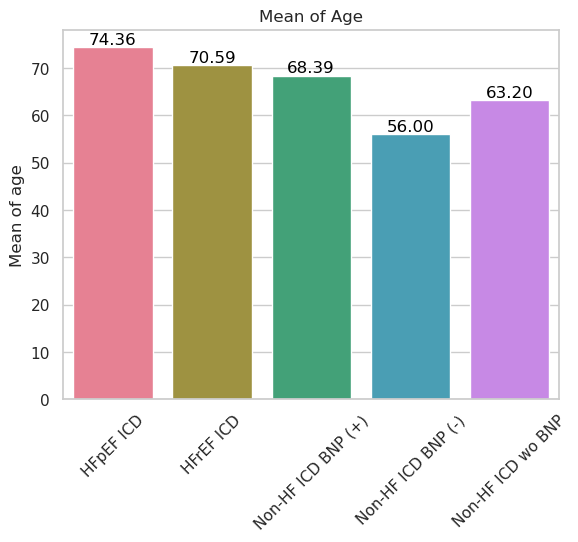

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp
column_name = 'age'

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3, df4, df5]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)
    
# Set the title and labels
ax.set_title('Mean of Age')
ax.set_ylabel(f'Mean of {column_name}')

# Show the plot
plt.show()


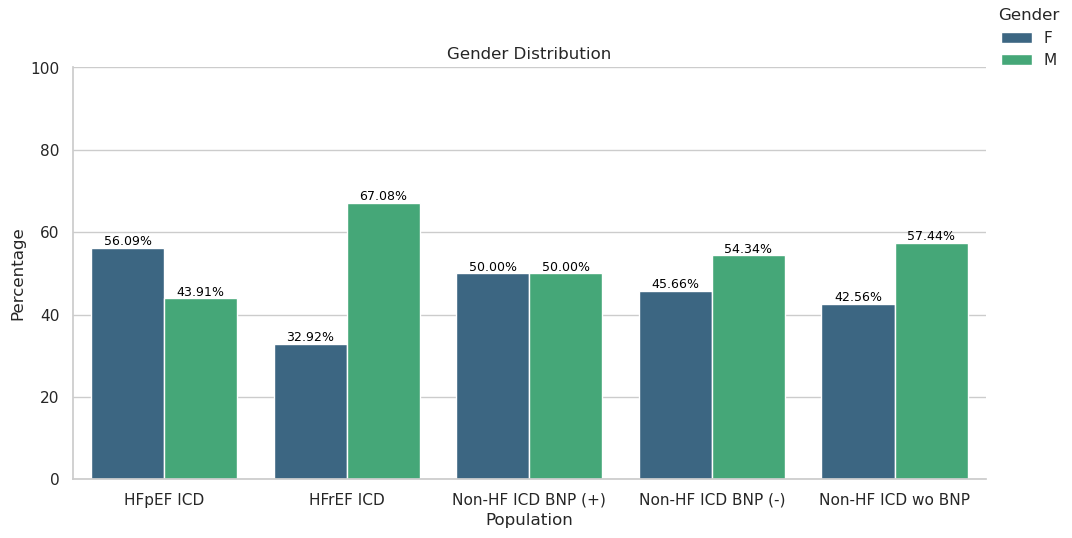

In [215]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# Replace these with your actual dataframes
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp

# Column name
column_name = 'gender'

# Calculate the percentages
percentages = [
    df[column_name].value_counts(normalize=True).reset_index() for df in [df1, df2, df3, df4, df5]
]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Combine percentages with labels
for i, perc in enumerate(percentages):
    perc['DF'] = labels[i]

# Combine all DataFrames
final_df = pd.concat(percentages).rename(columns={'index': 'Gender', column_name: 'Percentage'})
final_df['Percentage'] *= 100  # convert to percentage

# Plot
ax = sns.catplot(
    data=final_df,
    x='DF',
    y='Percentage',
    hue='Gender',
    kind='bar',
    palette='viridis',
    height=5,
    aspect=2
)

# Add percentages on the bars
for i, bar in enumerate(ax.ax.patches):
    h = bar.get_height()
    ax.ax.annotate(
        f'{h:.2f}%', 
        (bar.get_x() + bar.get_width() / 2, h), 
        ha="center", va="bottom",
        fontsize=9, color='black'
    )

# Set labels and title
ax.set_axis_labels("Population", "Percentage")
ax.ax.set_title("Gender Distribution")

# Move legend to avoid overlap
ax._legend.set_bbox_to_anchor((1, 1))

ax.ax.set_ylim(0, 100)

plt.show()


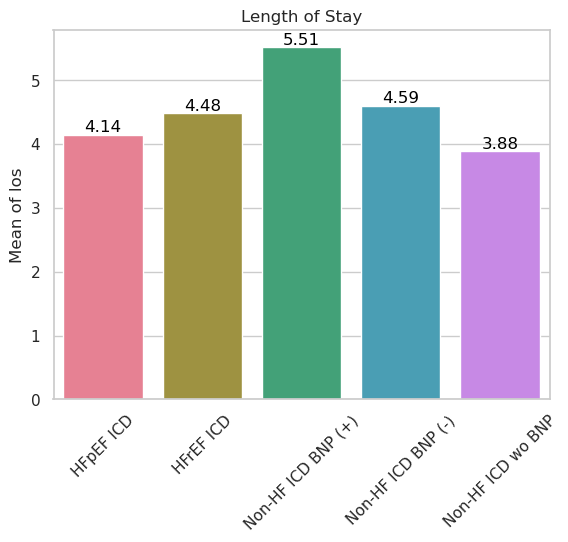

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp
column_name = 'los'

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3, df4, df5]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)    
    
# Set the title and labels
ax.set_title('Length of Stay')
ax.set_ylabel(f'Mean of {column_name}')

# Show the plot
plt.show()


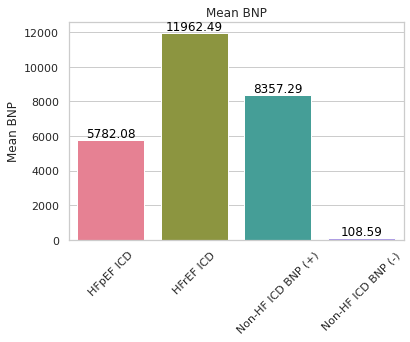

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3, df4 = hfpef_complete, hfref_complete, non_hf_positive_bnp, non_hf_negative_bnp
column_name = 50963

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3, df4]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)
    
# Set the title and labels
ax.set_title('Mean BNP')
ax.set_ylabel(f'Mean BNP')

# Show the plot
plt.show()


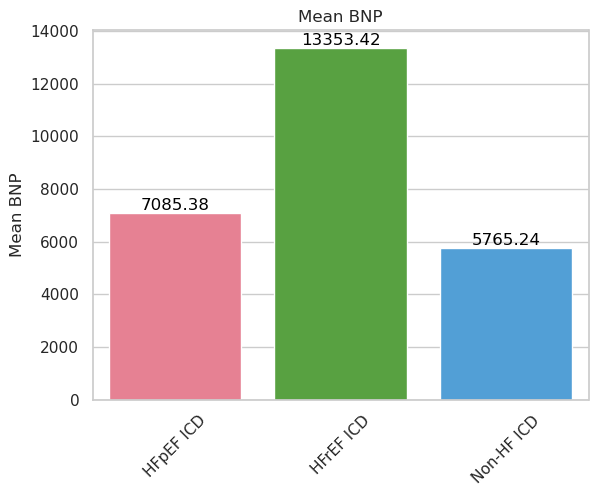

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3 = hfpef_total_complete, hfref_total_complete, non_hf_ce_lab_bnp
column_name = 50963

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)
    
# Set the title and labels
ax.set_title('Mean BNP')
ax.set_ylabel(f'Mean BNP')

# Show the plot
plt.show()


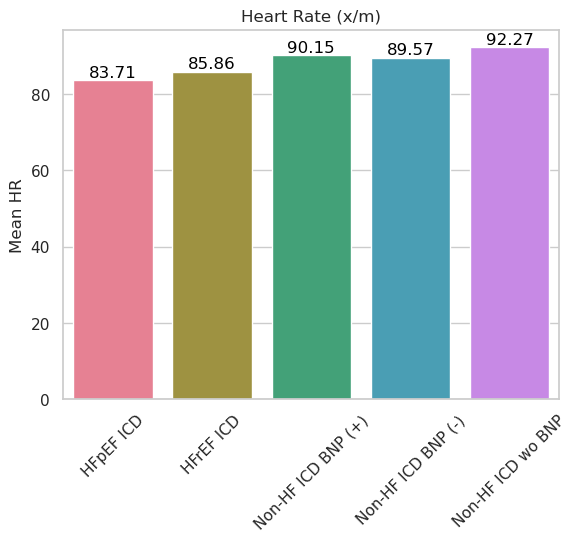

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp
column_name = 'Heart Rate'

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3, df4, df5]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)    
    
# Set the title and labels
ax.set_title('Heart Rate (x/m)')
ax.set_ylabel(f'Mean HR')

# Show the plot
plt.show()


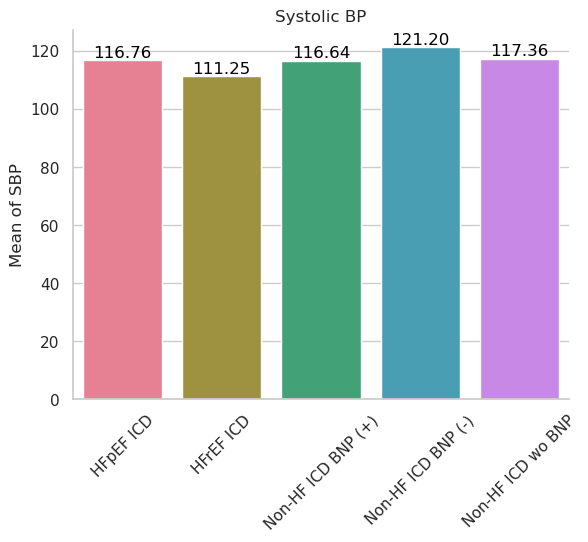

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp
column_name = 'Arterial Blood Pressure systolic'

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3, df4, df5]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")  # Adjust grid style here
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)    
    
# Set the title and labels
ax.set_title('Systolic BP')
ax.set_ylabel(f'Mean of SBP')

# Remove the top and right spines of the plot
sns.despine()

# Show the plot
plt.show()


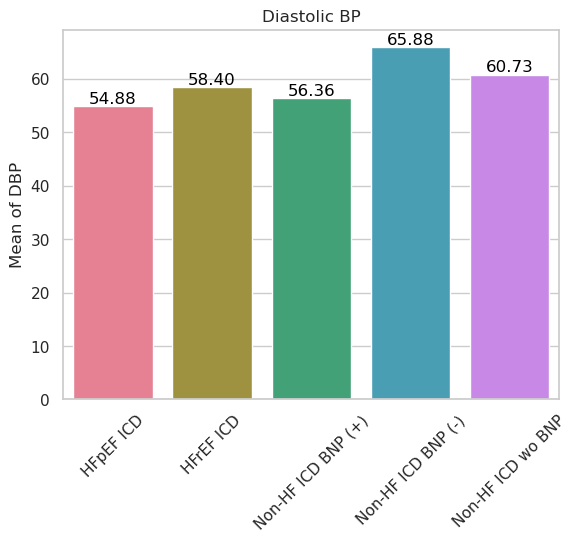

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp
column_name = 'Arterial Blood Pressure diastolic'

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3, df4, df5]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)    
    
# Set the title and labels
ax.set_title('Diastolic BP')
ax.set_ylabel(f'Mean of DBP')

# Show the plot
plt.show()


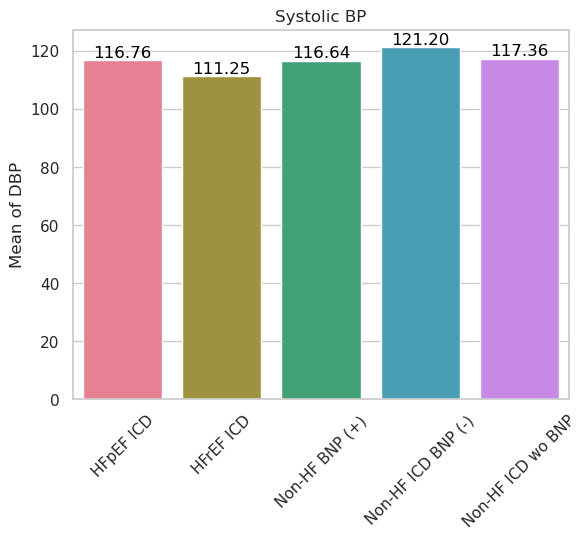

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp
column_name = 'Arterial Blood Pressure systolic'

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3, df4, df5]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)    
    
# Set the title and labels
ax.set_title('Systolic BP')
ax.set_ylabel(f'Mean of DBP')

# Show the plot
plt.show()


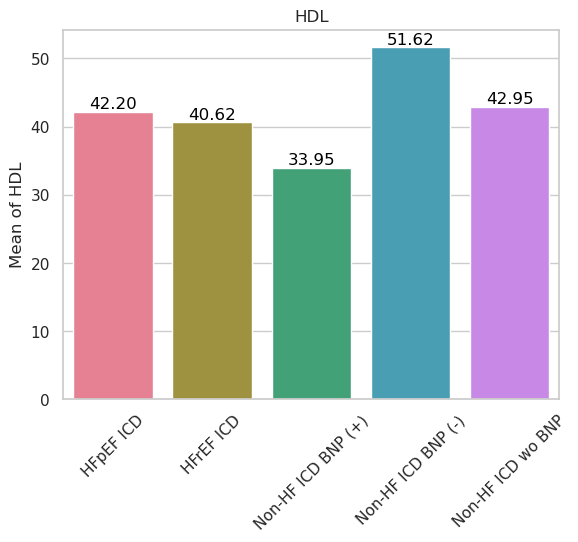

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp
column_name = 50904

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3, df4, df5]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)    
    
# Set the title and labels
ax.set_title('HDL')
ax.set_ylabel(f'Mean of HDL')

# Show the plot
plt.show()


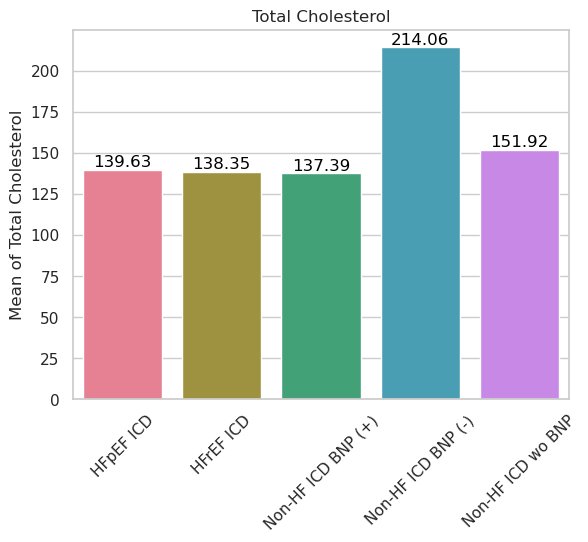

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp
column_name = 50907

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3, df4, df5]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)    
    
# Set the title and labels
ax.set_title('Total Cholesterol')
ax.set_ylabel(f'Mean of Total Cholesterol')

# Show the plot
plt.show()


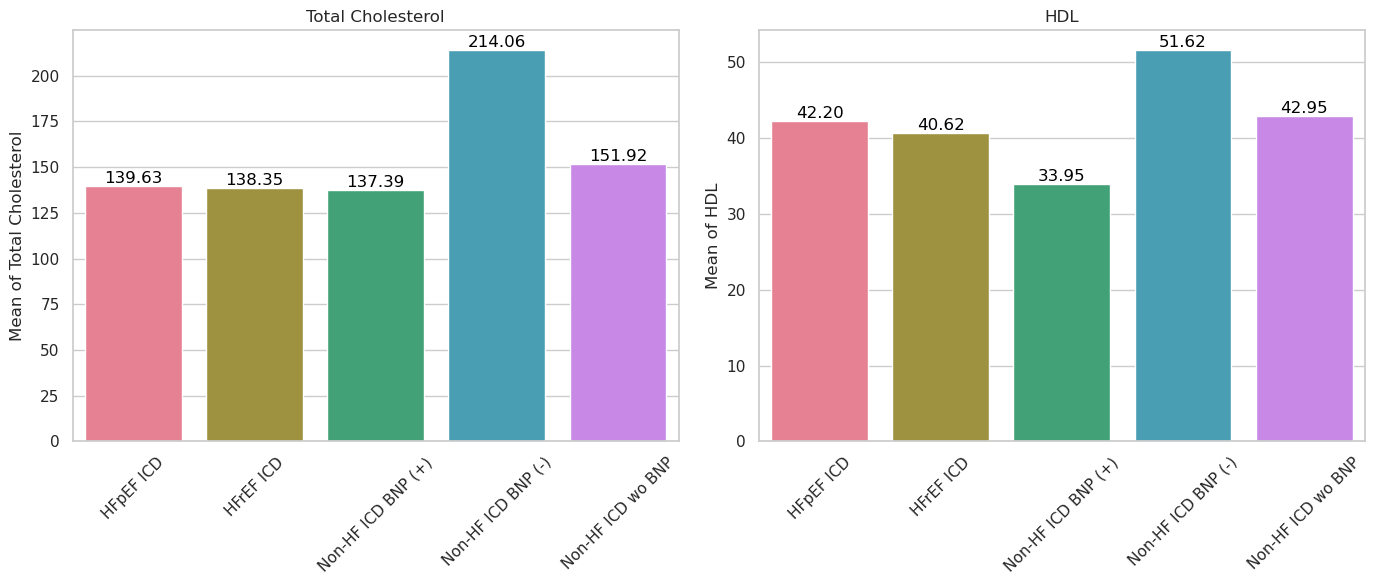

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample dataframes, replace these with your actual dataframes
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp

# Define the column names and titles
plot_data = [
    {'column_name': 50907, 'title': 'Total Cholesterol', 'ylabel': 'Mean of Total Cholesterol'},
    {'column_name': 50904, 'title': 'HDL', 'ylabel': 'Mean of HDL'}
]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Create a 1x2 subplot grid (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Loop through the axes and plot data
for ax, data in zip(axes, plot_data):
    column_name = data['column_name']
    title = data['title']
    ylabel = data['ylabel']

    # Calculate the means
    means = [df[column_name].mean() for df in [df1, df2, df3, df4, df5]]

    # Set a color palette
    palette = sns.color_palette("husl", len(means))

    # Create the bar plot
    sns.barplot(x=labels, y=means, palette=palette, ax=ax)

    # Add the actual value on top of the bars
    for i, mean in enumerate(means):
        ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(labels, rotation=45)

    # Set the title and labels
    ax.set_title(title)
    ax.set_ylabel(ylabel)

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()

# Show the plot
plt.show()


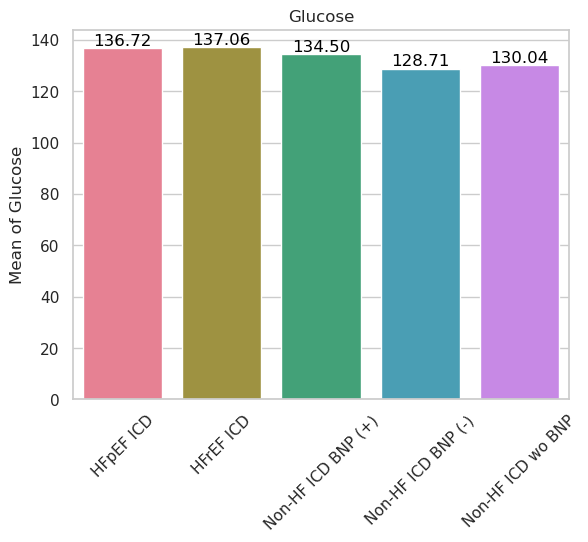

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume the dataframes are named df1, df2, df3, df4, and df5
# and the column to be plotted is 'column_name'

# Replace these with your actual dataframes and column name
df1, df2, df3, df4, df5 = hfpef_total_complete, hfref_total_complete, non_hf_positive_bnp, non_hf_negative_bnp, non_hf_ce_lab_missing_bnp
column_name = 50931

# Calculate the means
means = [df[column_name].mean() for df in [df1, df2, df3, df4, df5]]

# Create the labels for the bar chart
labels = ['HFpEF ICD', 'HFrEF ICD', 'Non-HF ICD BNP (+)', 'Non-HF ICD BNP (-)', 'Non-HF ICD wo BNP']

# Set a color palette
palette = sns.color_palette("husl", len(means))

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=labels, y=means, palette=palette)

# Add the actual value on top of the bars
for i, mean in enumerate(means):
    ax.text(i, mean, f'{mean:.2f}', ha="center", va="bottom", color='black')

# Rotate x-axis labels for better readability
ax.set_xticklabels(labels, rotation=45)    
    
# Set the title and labels
ax.set_title('Glucose')
ax.set_ylabel(f'Mean of Glucose')

# Show the plot
plt.show()


# Add Race

In [240]:
#Loading dataset
ed_stays = pd.read_csv('ed/edstays.csv.gz')

In [241]:
ed_stays.head()

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED


In [243]:
combined_df = pd.merge(combined_df, ed_stays[['subject_id','race']], on='subject_id', how='left')

In [244]:
combined_df.head()

,subject_id,hadm_id,stay_id,age,gender,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963,label,race
0,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.75,NaN,HFpEF,WHITE
1,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.75,NaN,HFpEF,WHITE
2,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.75,NaN,HFpEF,OTHER
3,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.75,NaN,HFpEF,WHITE
4,10002013,23581541,39060235,57,F,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.75,NaN,HFpEF,WHITE


In [246]:
# Define the column you want to move
column_to_move = 'race'

# Define the desired position (0-based index)
desired_position = 5

# Extract the column
column = combined_df[column_to_move]

# Drop the column from its current position
combined_df = combined_df.drop(columns=[column_to_move])

# Reinsert the column at the desired position
combined_df.insert(desired_position, column_to_move, column)

# Display the modified DataFrame
combined_df.head()

,subject_id,hadm_id,stay_id,age,gender,race,los,intime,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,seq_num,icd_code,icd_version,50904,50907,50931,50963,label
0,10002013,23581541,39060235,57,F,WHITE,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.75,NaN,HFpEF
1,10002013,23581541,39060235,57,F,WHITE,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.75,NaN,HFpEF
2,10002013,23581541,39060235,57,F,OTHER,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.75,NaN,HFpEF
3,10002013,23581541,39060235,57,F,WHITE,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.75,NaN,HFpEF
4,10002013,23581541,39060235,57,F,WHITE,1.314352,2160-05-18 10:00:53,61.47619,110.619048,94.636364,2,42832,9,NaN,NaN,181.75,NaN,HFpEF


In [247]:
combined_df.to_csv('complete_dataset_hf_non_hf.csv', index=False)

In [ ]:
combined_df['group'] = if combined_df['label'].str.contains('hfpef')

In [248]:
from tableone import TableOne, load_dataset

In [256]:
columns = ['age', 'gender', 'los', 'label']

categorical = ['gender']

groupby = ['label']
nonnormal = ['Age']
labels={'death': 'Outcome'}

mytable = TableOne(combined_df, columns=columns, categorical=categorical, \
                   groupby=groupby, nonnormal=nonnormal, rename=labels, pval=True)

mytable.tabulate(tablefmt="fancy_grid")


'╒════════════════╤════╤═══════════╤═══════════════╤══════════════╤════════════════╤══════════════╤════════════════╤══════════════════╤══════════════════╤═════════════════╤═══════════╕\n│                │    │ Missing   │ Overall       │ HFpEF        │ HFpEF wo BNP   │ HFrEF        │ HFrEF wo BNP   │ Non-HF BNP (+)   │ Non-HF BNP (-)   │ Non-HF wo BNP   │ P-Value   │\n╞════════════════╪════╪═══════════╪═══════════════╪══════════════╪════════════════╪══════════════╪════════════════╪══════════════════╪══════════════════╪═════════════════╪═══════════╡\n│ n              │    │           │ 257330        │ 37955        │ 27973          │ 27411        │ 21241          │ 4169             │ 534              │ 138047          │           │\n├────────────────┼────┼───────────┼───────────────┼──────────────┼────────────────┼──────────────┼────────────────┼──────────────────┼──────────────────┼─────────────────┼───────────┤\n│ age, mean (SD) │    │ 0         │ 64.0 (16.2)   │ 70.7 (13.8)  │ 70.5 (1

In [257]:
mytable.to_excel('mytable.xlsx')